# House Prices Prediction

## ** Notebook Content **

1. Introduction


2. Previous Data Analysis
    - 2.1 Importing the required packages
    - 2.2 Loading the dataset
    - 2.3 'SalePrice' distribution analysis
    - 2.4 Variables Correlation analysis
    
    
3. Data Cleaning
    - 3.1 Merging the training and test dataframes
    - 3.2 Missing data analysis
        * 3.2.1 Missing for columns
        * 3.2.2 Missing for rows
    - 3.3 Splitting the data into Training and Test
    - 3.4 Saving the changes
    
    
4. Correlation Analysis & Data Visualization
    - 4.1 Correlation Analysis
    - 4.2 Data Visualization & Categorical Data Analysis ======>>>> pending include some comments


5. Building the Prediction Models
    - 5.1 Preparing the data
        * 5.1.1 Convert categorical variables into numerical variables.
        * 5.1.2 Getting the Independent and Dependent variables.
    - 5.2 Variables Selection
        * 5.2.1 Applying Backward Elimination and PValues Logic ======>>>> under construction
        * 5.2.2 Applying Correlation Analysis  ======>>>> under construction

6. Back-Up

## 1 Introduction 

The goal of this project is to **find the best fitting model for predicting the house prices of the city of Ames**, using advanced regressions techniques, such as random forest or gradient boosting.

To do this, we will use a data set composed of 2930 observations and 80 variables (23 nominal, 23 ordinal, 14 discrete and 20 continous), which describes the sale of individual residential property in Ames from 2006 to 2010. The data has been provided by the Ames City Assesor's Office.

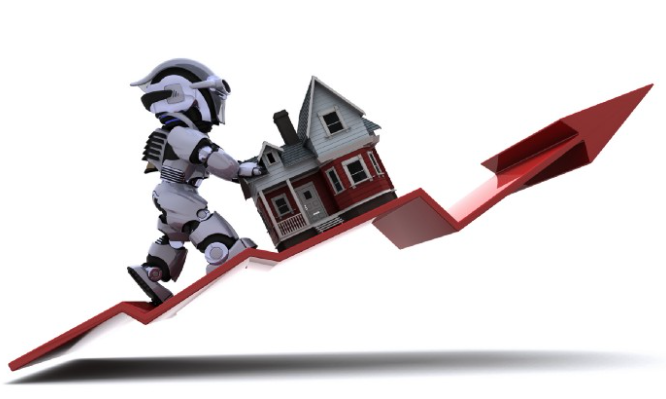

In [1]:
from IPython.core.display import Image
Image("HOUSE_PRICE_PREDICTION.PNG")

## 2 Previous Analysis 

### 2.1 Importing the requiered packages 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 2.2 Loading the dataset 

#### 2.2.1 Checking the training set 

In [3]:
#loading the training set
df_train = pd.read_csv('train.csv')
df_train.head(15)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5          Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7          Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
10         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
11         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
12         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
13         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
14         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       2   2008        WD         Normal     208500  
1       5   2007        WD         Normal     181500  
2       9   2008        WD         Normal     223500  
3       2   2006        WD        Abnorml     140000  
4      12   2008        WD         Normal     250000  
5      10   2009        WD         Normal     143000  
6       8   2007        WD         Normal     307000  
7      11   2009        WD         Normal     200000  
8       4   2008        WD        Abnorml     129900  
9       1   2008        WD         Normal     118000  
10      2   2008        WD         Normal     129500  
11      7   2006       New        Partial     345000  
12      9   2008        WD         Normal     144000  
13      8   2007       New        Partial     279500  
14      5   2008        WD         Normal     157000  

[15 rows x 81 columns]

In [4]:
#check the shape of the data
df_train.shape

(1460, 81)

In [5]:
#check the type of data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

__Important!__
After checking the information of the dataset, we realised that the variable *SalePrice* is the dependent variable (the value that we want to predict with our model).

#### 2.2.2 Checking the test set 

In [6]:
#loading the test set
df_test = pd.read_csv('test.csv')
df_test.head(15)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1461          20       RH         80.0    11622   Pave   NaN      Reg   
1   1462          20       RL         81.0    14267   Pave   NaN      IR1   
2   1463          60       RL         74.0    13830   Pave   NaN      IR1   
3   1464          60       RL         78.0     9978   Pave   NaN      IR1   
4   1465         120       RL         43.0     5005   Pave   NaN      IR1   
5   1466          60       RL         75.0    10000   Pave   NaN      IR1   
6   1467          20       RL          NaN     7980   Pave   NaN      IR1   
7   1468          60       RL         63.0     8402   Pave   NaN      IR1   
8   1469          20       RL         85.0    10176   Pave   NaN      Reg   
9   1470          20       RL         70.0     8400   Pave   NaN      Reg   
10  1471         120       RH         26.0     5858   Pave   NaN      IR1   
11  1472         160       RM         21.0     1680   Pave   NaN      Reg   
12  1473         160       RM         21.0     1680   Pave   NaN      Reg   
13  1474         160       RL         24.0     2280   Pave   NaN      Reg   
14  1475         120       RL         24.0     2280   Pave   NaN      Reg   

   LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0          Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1          Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2          Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3          Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4          HLS    AllPub  ...         144        0    NaN    NaN         NaN   
5          Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
6          Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
7          Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
8          Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
9          Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
10         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
11         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
12         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
13         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
14         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  
0        0      6    2010        WD         Normal  
1    12500      6    2010        WD         Normal  
2        0      3    2010        WD         Normal  
3        0      6    2010        WD         Normal  
4        0      1    2010        WD         Normal  
5        0      4    2010        WD         Normal  
6      500      3    2010        WD         Normal  
7        0      5    2010        WD         Normal  
8        0      2    2010        WD         Normal  
9        0      4    2010        WD         Normal  
10       0      6    2010        WD         Normal  
11       0      2    2010       COD         Normal  
12       0      3    2010        WD         Normal  
13       0      6    2010        WD         Normal  
14       0      6    2010        WD         Normal  

[15 rows x 80 columns]

In [7]:
#check the shape of the data
df_test.shape

(1459, 80)

In [8]:
#check the type of data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### 2.3 'SalePrice' distribution analysis

Firstly, we need to check the SalePrice column to clearly understand the distibution of prices.

We are going to analyze if the dependent variable (SalePrice) follows a normal distribution.

In [9]:
#check the  main statistics of the dependent variable 
df_train['SalePrice'].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Keeping in mind the statistics, the mean price is around 180k USD. The most expensive house is for 775k USD and the cheapest is only for 34,9k USD. In addition, the 50% quantile lies at 163k USD.

Let's build a histogram to review the distribution of the house prices.

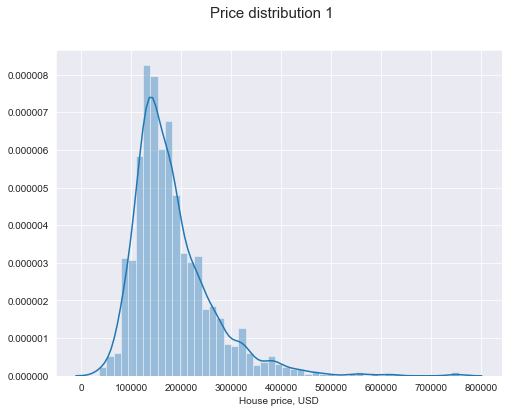

In [10]:
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train['SalePrice'], ax=ax)

ax.set_xlabel('House price, USD')
plt.suptitle('Price distribution 1', size=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


Text(0.5, 1.0, 'SalePrice Histogram 2')

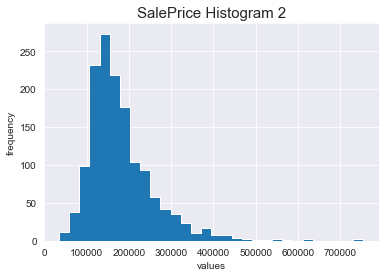

In [11]:
# histogram 1
df_train['SalePrice'].hist(normed=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('SalePrice Histogram 2', fontsize = 15)

We can see that the y_train variable does not follow a normal distribution (Gaussian distribution).

Let's check how many houses have a price higher than 500000 USD.

In [12]:
df_train.query('SalePrice > 442567.0100000005')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
178    179          20       RL         63.0    17423   Pave   NaN      IR1   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
440    441          20       RL        105.0    15431   Pave   NaN      Reg   
527    528          60       RL         67.0    14948   Pave   NaN      IR1   
591    592          60       RL         97.0    13478   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
769    770          60       RL         47.0    53504   Pave   NaN      IR2   
798    799          60       RL        104.0    13518   Pave   NaN      Reg   
803    804          60       RL        107.0    13891   Pave   NaN      Reg   
898    899          20       RL        100.0    12919   Pave   NaN      IR1   
1046  1047          60       RL         85.0    16056   Pave   NaN      IR1   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1373  1374          20       RL          NaN    11400   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
178          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
185          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
440          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
527          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
591          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
769          HLS    AllPub  ...        0    NaN    NaN         NaN       0   
798          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
803          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
898          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1046         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1243         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1373         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
178       7   2009       New        Partial     501837  
185       6   2006        WD         Normal     475000  
440       4   2009        WD         Normal     555000  
527      11   2008       New        Partial     446261  
591       6   2009     ConLI         Normal     451950  
691       1   2007        WD         Normal     755000  
769       6   2010        WD         Normal     538000  
798       7   2009       New        Partial     485000  
803       1   2009       New        Partial     582933  
898       3   2010       New        Partial     611657  
1046      7   2006       New        Partial     556581  
1169      7   2006        WD         Normal     625000  
1182      7   2007        WD        Abnorml     745000  
1243      9   2006       New        Partial     465000  
1373      3   2007        WD         Normal     466500  

[15 rows x 81 columns]

In [13]:
len(df_train.query('SalePrice > 442567.0100000005'))

15

We can see that **only 15 houses have a price more than 440.000 UDS**. It seems like we can drop them as outliers in the future.

In [14]:
#Checking the indexes related to the outliers
df_train.query('SalePrice > 442567.0100000005')
id_outliers = list(df_train.query('SalePrice > 442567.0100000005')['Id'])
print(id_outliers)

[179, 186, 441, 528, 592, 692, 770, 799, 804, 899, 1047, 1170, 1183, 1244, 1374]


In [15]:
#delete the outliers values
df_train.drop([178, 185, 440, 527, 591, 691, 769, 798, 803, 898, 1046, 1169, 1182, 1243, 1373], inplace=True)

In [16]:
#check the shape of the dataframe after deleting the outliers
df_train.shape

(1445, 81)

In [17]:
#check the main statistics of the dependent variable (y_train)
df_train['SalePrice'].describe() 

count      1445.000000
mean     177082.510035
std       69614.603756
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212000.000000
max      440000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'SalePrice Histogram 2')

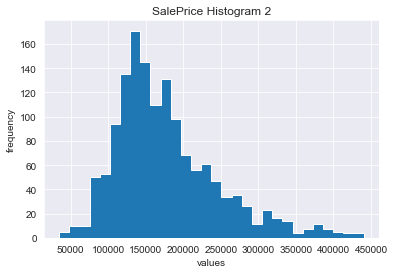

In [18]:
# histogram 2
df_train['SalePrice'].hist(normed=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('SalePrice Histogram 2')

__Comments:__
After dropping the outliears from the df_training set, we realized that the SalePrice variables shows a distribution closer to a *normal distribution*. 

__Important:__
We have decided to drop the outliers from the df_training directly in order to avoid deleting records with duplicate records in the Id column, since when combining the training set and test set in a single dataframe the variable Id shows duplicate values.

## 3 Data Cleaning

### 3.1 Merging the training and test dataframes

Let's combine two datasets (X_train and df_test) and work with the data faster.

In [19]:
#generate the 'origin' column.
df_train['origin']= 0
df_test['origin']= 100

In [20]:
#create the variable df_total, which is a dataframe union of df_test and df_train
df_total = pd.concat([df_train,df_test], sort = False)

In [21]:
df_total.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0          Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2008   
1          Lvl    AllPub  ...    NaN    NaN         NaN       0      5   2007   
2          Lvl    AllPub  ...    NaN    NaN         NaN       0      9   2008   
3          Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2006   
4          Lvl    AllPub  ...    NaN    NaN         NaN       0     12   2008   
5          Lvl    AllPub  ...    NaN  MnPrv        Shed     700     10   2009   
6          Lvl    AllPub  ...    NaN    NaN         NaN       0      8   2007   
7          Lvl    AllPub  ...    NaN    NaN        Shed     350     11   2009   
8          Lvl    AllPub  ...    NaN    NaN         NaN       0      4   2008   
9          Lvl    AllPub  ...    NaN    NaN         NaN       0      1   2008   
10         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2008   
11         Lvl    AllPub  ...    NaN    NaN         NaN       0      7   2006   
12         Lvl    AllPub  ...    NaN    NaN         NaN       0      9   2008   
13         Lvl    AllPub  ...    NaN    NaN         NaN       0      8   2007   
14         Lvl    AllPub  ...    NaN   GdWo         NaN       0      5   2008   
15         Lvl    AllPub  ...    NaN  GdPrv         NaN       0      7   2007   
16         Lvl    AllPub  ...    NaN    NaN        Shed     700      3   2010   
17         Lvl    AllPub  ...    NaN    NaN        Shed     500     10   2006   
18         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2008   
19         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      5   2009   

   SaleType  SaleCondition  SalePrice  origin  
0        WD         Normal   208500.0       0  
1        WD         Normal   181500.0       0  
2        WD         Normal   223500.0       0  
3        WD        Abnorml   140000.0       0  
4        WD         Normal   250000.0       0  
5        WD         Normal   143000.0       0  
6        WD         Normal   307000.0       0  
7        WD         Normal   200000.0       0  
8        WD        Abnorml   129900.0       0  
9        WD         Normal   118000.0       0  
10       WD         Normal   129500.0       0  
11      New        Partial   345000.0       0  
12       WD         Normal   144000.0       0  
13      New        Partial   279500.0       0  
14    

In [22]:
#check the shape of df_total
df_total.shape

(2904, 82)

In [23]:
#check the datatype of the df_total values
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 1458
Data columns (total 82 columns):
Id               2904 non-null int64
MSSubClass       2904 non-null int64
MSZoning         2900 non-null object
LotFrontage      2419 non-null float64
LotArea          2904 non-null int64
Street           2904 non-null object
Alley            198 non-null object
LotShape         2904 non-null object
LandContour      2904 non-null object
Utilities        2902 non-null object
LotConfig        2904 non-null object
LandSlope        2904 non-null object
Neighborhood     2904 non-null object
Condition1       2904 non-null object
Condition2       2904 non-null object
BldgType         2904 non-null object
HouseStyle       2904 non-null object
OverallQual      2904 non-null int64
OverallCond      2904 non-null int64
YearBuilt        2904 non-null int64
YearRemodAdd     2904 non-null int64
RoofStyle        2904 non-null object
RoofMatl         2904 non-null object
Exterior1st      2903 non-

In [24]:
#export the data to csv
df_total.to_csv('df_total.csv', index=False)

In [25]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 1458
Data columns (total 82 columns):
Id               2904 non-null int64
MSSubClass       2904 non-null int64
MSZoning         2900 non-null object
LotFrontage      2419 non-null float64
LotArea          2904 non-null int64
Street           2904 non-null object
Alley            198 non-null object
LotShape         2904 non-null object
LandContour      2904 non-null object
Utilities        2902 non-null object
LotConfig        2904 non-null object
LandSlope        2904 non-null object
Neighborhood     2904 non-null object
Condition1       2904 non-null object
Condition2       2904 non-null object
BldgType         2904 non-null object
HouseStyle       2904 non-null object
OverallQual      2904 non-null int64
OverallCond      2904 non-null int64
YearBuilt        2904 non-null int64
YearRemodAdd     2904 non-null int64
RoofStyle        2904 non-null object
RoofMatl         2904 non-null object
Exterior1st      2903 non-

### 3.2 Missing data analysis

We are going to review how many null values we have in the dataset.

In [26]:
#check how many null values there are in the dataset
df_total.isnull().sum().sum()

15364

Really, **there are a total of 13905 records with nan values**. The remaining 1459 values are those values of the Y variable that do not appear in the test set (15364 - 13095 = 1459)

We are going to analyze the dimension of the dataset by columns and rows to decide what columns and rows should be rejected from the dataset.

#### 3.2.1 Missing per columns

Le's check the percentage of null values per column, filtering only for those columns that have NaN values.

In [27]:
#Creating table with "% missing"
total_missing = df_total.isnull().sum().sort_values(ascending=False)
percent = (df_total.isnull().sum()/df_total.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(35)

Total   Percent
PoolQC         2895  0.996901
MiscFeature    2799  0.963843
Alley          2706  0.931818
Fence          2335  0.804063
SalePrice      1459  0.502410
FireplaceQu    1420  0.488981
LotFrontage     485  0.167011
GarageFinish    159  0.054752
GarageYrBlt     159  0.054752
GarageQual      159  0.054752
GarageCond      159  0.054752
GarageType      157  0.054063
BsmtCond         82  0.028237
BsmtExposure     82  0.028237
BsmtQual         81  0.027893
BsmtFinType2     80  0.027548
BsmtFinType1     79  0.027204
MasVnrType       23  0.007920
MasVnrArea       22  0.007576
MSZoning          4  0.001377
BsmtFullBath      2  0.000689
BsmtHalfBath      2  0.000689
Utilities         2  0.000689
Functional        2  0.000689
BsmtUnfSF         1  0.000344
Exterior2nd       1  0.000344
Exterior1st       1  0.000344
TotalBsmtSF       1  0.000344
Electrical        1  0.000344
KitchenQual       1  0.000344
GarageArea        1  0.000344
BsmtFinSF2        1  0.000344
SaleType          1  0.000344
BsmtFinSF1        1  0.000344
GarageCars        1  0.000344

We are going to remove those columns that have a percentage of null values higher than 48%, as they do not provide enough information to analyze.

Therefore, we are going to remove the following variables from the dataset: 'Alley', 'PoolQC', 'Fence', 'MiscFeature' and 'FireplaceQu'.

In [28]:
#remove the MiscFeature, Fence, PoolQC and Alley variables
df_total.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'FireplaceQu'], axis = 1, inplace = True)

In [29]:
#check the shape of the training set after removing the variables 
df_total.shape

(2904, 77)

Now, we are going to replace the null values with the mean / median in the remaining numeric variables.

Remaining numerical variables to treat => LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, GarageYrBlt, GarageCars, GarageArea.       

In [30]:
median_LotFrontage = df_total['LotFrontage'].median(skipna = True)
median_MasVnrArea = df_total['MasVnrArea'].median(skipna = True)
median_BsmtFinSF1 = df_total['BsmtFinSF1'].median(skipna = True)
median_BsmtFinSF2 = df_total['BsmtFinSF2'].median(skipna = True)
median_BsmtUnfSF = df_total['BsmtUnfSF'].median(skipna = True)
median_TotalBsmtSF = df_total['TotalBsmtSF'].median(skipna = True)
median_BsmtFullBath = df_total['BsmtFullBath'].median(skipna = True)
median_BsmtHalfBath = df_total['BsmtHalfBath'].median(skipna = True)
median_GarageYrBlt = df_total['GarageYrBlt'].median(skipna = True)
median_GarageCars = df_total['GarageCars'].median(skipna = True)
median_GarageArea = df_total['GarageArea'].median(skipna = True)

In [31]:
print(median_LotFrontage, median_MasVnrArea , median_BsmtFinSF1, median_BsmtFinSF2, median_BsmtUnfSF, median_TotalBsmtSF)

68.0 0.0 368.0 0.0 467.0 988.0


In [32]:
print(median_BsmtFullBath, median_BsmtHalfBath, median_GarageYrBlt, median_GarageCars, median_GarageArea)

0.0 0.0 1979.0 2.0 478.0


In [33]:
df_total['MasVnrArea'].describe()

count    2882.000000
mean      100.010756
std       174.782940
min         0.000000
25%         0.000000
50%         0.000000
75%       162.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [34]:
df_total['BsmtFinSF2'].describe()

count    2903.000000
mean       49.652773
std       169.363872
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [35]:
df_total['BsmtFullBath'].describe()

count    2902.00000
mean        0.42867
std         0.52472
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         3.00000
Name: BsmtFullBath, dtype: float64

In [36]:
df_total['BsmtHalfBath'].describe()

count    2902.000000
mean        0.061337
std         0.245667
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

In [37]:
#compute the mean for the MasVnrArea, BsmtFinSF2, BsmtFullBath and BsmtHalfBath variables
mean_MasVnrArea = df_total['MasVnrArea'].mean(skipna = True)
mean_BsmtFinSF2 = df_total['BsmtFinSF2'].mean(skipna = True)
mean_BsmtFullBath = df_total['BsmtFullBath'].mean(skipna = True)
mean_BsmtHalfBath = df_total['BsmtHalfBath'].mean(skipna = True)

In [38]:
print(mean_MasVnrArea, mean_BsmtFinSF2, mean_BsmtFullBath, mean_BsmtHalfBath)

100.01075641915337 49.652772993455045 0.4286698828394211 0.061337008959338385


In [39]:
#replace the na/nan values by the respective median/mean
df_total['LotFrontage'] = df_total['LotFrontage'].replace(np.NaN, median_LotFrontage)
df_total['MasVnrArea'] = df_total['MasVnrArea'].replace(np.NaN, mean_MasVnrArea)
df_total['BsmtFinSF1'] = df_total['BsmtFinSF1'].replace(np.NaN, median_BsmtFinSF1)
df_total['BsmtFinSF2'] = df_total['BsmtFinSF2'].replace(np.NaN, mean_BsmtFinSF2)
df_total['BsmtUnfSF'] = df_total['BsmtUnfSF'].replace(np.NaN, median_BsmtUnfSF)
df_total['TotalBsmtSF'] = df_total['TotalBsmtSF'].replace(np.NaN, median_TotalBsmtSF)
df_total['BsmtFullBath'] = df_total['BsmtFullBath'].replace(np.NaN, mean_BsmtFullBath)
df_total['BsmtHalfBath'] = df_total['BsmtHalfBath'].replace(np.NaN, mean_BsmtHalfBath)
df_total['GarageYrBlt'] = df_total['GarageYrBlt'].replace(np.NaN, median_GarageYrBlt)
df_total['GarageCars'] = df_total['GarageCars'].replace(np.NaN, median_GarageCars)
df_total['GarageArea'] = df_total['GarageArea'].replace(np.NaN, median_GarageArea)

In [40]:
#check null values in the treated variables
df_total['LotFrontage'].isnull().sum().sum()
df_total['MasVnrArea'].isnull().sum().sum()
df_total['BsmtFinSF1'].isnull().sum().sum()
df_total['BsmtFinSF2'].isnull().sum().sum()
df_total['BsmtUnfSF'].isnull().sum().sum()
df_total['TotalBsmtSF'].isnull().sum().sum()
df_total['BsmtFullBath'].isnull().sum().sum()
df_total['BsmtHalfBath'].isnull().sum().sum()
df_total['GarageYrBlt'].isnull().sum().sum()
df_total['GarageCars'].isnull().sum().sum()
df_total['GarageArea'].isnull().sum().sum()

0

In [41]:
#check how many null values there are in the dataset (after cleaning the numerical variables)
df_total.isnull().sum().sum()

2533

After cleaning the numerical values, **we have pending to treat a toal of 1.074 nan values** without keeping in mind the SalePrice values (2533 - 1459 = 1074).

It is important to remark that we have deleted a total of 12.831 nan values (13.905 - 1.074).

#### 3.2.2 Missing per rows 

There are some rows with a lot of "NaN" values. In order to inspect it quickly, we get the total nan values for each row.

We look wich rows have more than 70% columns with "NaN" values. (i.e. with more than 12 columns empty).

In [42]:
# To get the total number for each row
nansrows = pd.DataFrame({'total_nans':df_total.isnull().sum(axis=1)})
nansrows[nansrows['total_nans']>11].count()

total_nans    0
dtype: int64

Now, we extract the total "NaN" values for each column, to look wich columns are the "typical" empty.

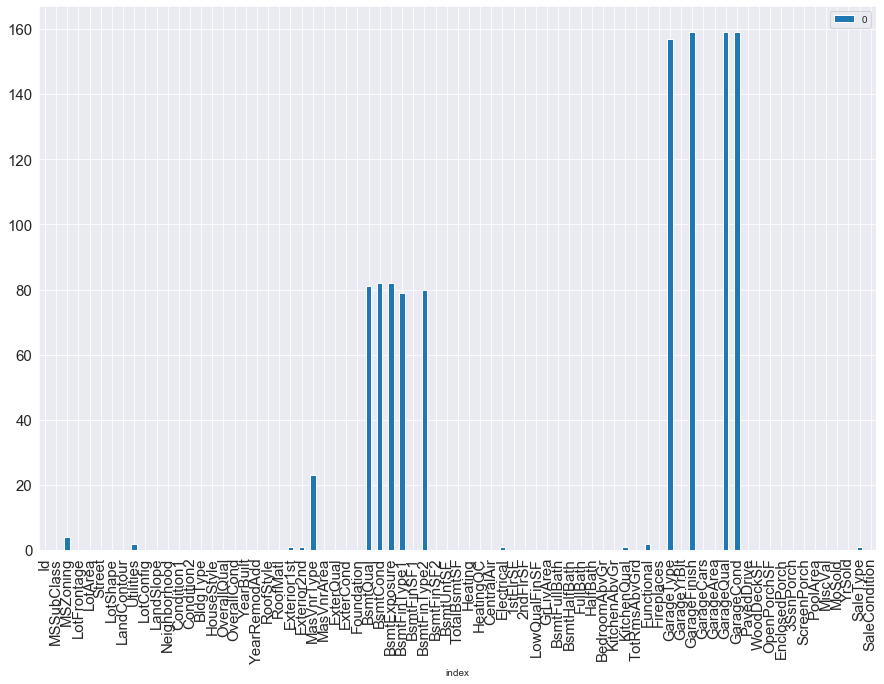

In [43]:
# Couting the total nans for each column
toplot = df_total.iloc[:, :-2].isna().sum() #we do not include the SalePrice and Origin variables
#Ploting the total nans for column
toplot.reset_index().plot(x = 'index', kind = 'bar', figsize=(15,10), fontsize = 15)

In [44]:
#Creating table with "% missing" for categorical variables
total_missing = df_total.iloc[:, :-2].isnull().sum().sort_values(ascending=False)
percent = (df_total.iloc[:, :-2].isnull().sum()/df_total.iloc[:, :-2].isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(18)

Total   Percent
GarageCond      159  0.054752
GarageQual      159  0.054752
GarageFinish    159  0.054752
GarageType      157  0.054063
BsmtExposure     82  0.028237
BsmtCond         82  0.028237
BsmtQual         81  0.027893
BsmtFinType2     80  0.027548
BsmtFinType1     79  0.027204
MasVnrType       23  0.007920
MSZoning          4  0.001377
Utilities         2  0.000689
Functional        2  0.000689
Electrical        1  0.000344
SaleType          1  0.000344
Exterior2nd       1  0.000344
Exterior1st       1  0.000344
KitchenQual       1  0.000344

We are going to remove the lines with nan values from the variables 'MSZoning', 'Functional', 'Utililies', 'SaleType', 'Electrical', 'KitchenQual', 'Exterior2nd', 'Exterior' and 'MasVnrType', as they are the ones that have the lowest percentage of null values in the dataset.

In [45]:
df_total.dropna(subset = ['MSZoning'], inplace=True)
df_total.dropna(subset = ['Functional'], inplace=True)
df_total.dropna(subset = ['Utilities'], inplace=True)
df_total.dropna(subset = ['SaleType'], inplace=True)
df_total.dropna(subset = ['Electrical'], inplace=True)
df_total.dropna(subset = ['KitchenQual'], inplace=True)
df_total.dropna(subset = ['Exterior2nd'], inplace=True)
df_total.dropna(subset = ['Exterior1st'], inplace=True)
df_total.dropna(subset = ['MasVnrType'], inplace=True)

In [46]:
df_total.shape

(2871, 77)

In [47]:
#Creating table with "% missing" for categorical variables
total_missing = df_total.iloc[:, :-2].isnull().sum().sort_values(ascending=False)
percent = (df_total.iloc[:, :-2].isnull().sum()/df_total.iloc[:, :-2].isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(9)

Total   Percent
GarageFinish    157  0.054685
GarageCond      157  0.054685
GarageQual      157  0.054685
GarageType      155  0.053988
BsmtExposure     79  0.027517
BsmtCond         79  0.027517
BsmtQual         78  0.027168
BsmtFinType2     77  0.026820
BsmtFinType1     76  0.026472

In [48]:
#drop the records with NaN values
df_total.dropna(subset = ['GarageCond'], inplace=True)
df_total.dropna(subset = ['BsmtExposure'], inplace=True)
df_total.dropna(subset = ['BsmtCond'], inplace=True)
df_total.dropna(subset = ['BsmtQual'], inplace=True)
df_total.dropna(subset = ['BsmtFinType2'], inplace=True)

In [49]:
#check if ther are missing values after performing the changes
df_total.iloc[:, :-2].isnull().sum().sum()

0

In [50]:
df_total.shape

(2643, 77)

###  3.3 Splitting the data into training and test dataframes

Before spliting the X_total into training and set, we will check how looks the 'origin' column after the normalization

In [51]:
# The train data has origin 0, and the test data 100
df_total['origin']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
       ... 
1420    100
1421    100
1422    100
1423    100
1424    100
1425    100
1426    100
1427    100
1429    100
1430    100
1434    100
1435    100
1436    100
1437    100
1438    100
1439    100
1440    100
1441    100
1442    100
1443    100
1445    100
1446    100
1447    100
1448    100
1450    100
1451    100
1452    100
1455    100
1456    100
1458    100
Name: origin, Length: 2643, dtype: int64

In [52]:
#al ser los números enteros (sin decimales), esta linea no hace falta
#df_total['origin'] = round(df_total['origin'])

In [53]:
# Split the dataset into training set and test set
df_train_clean = df_total[df_total['origin'] == 0].drop('origin', axis=1)
df_test_clean = df_total[df_total['origin'] == 100].drop('origin', axis=1)
df_train_clean.shape, df_test_clean.shape, df_total.shape

((1324, 76), (1319, 76), (2643, 77))

In [54]:
#drop the 'Id' column from the training and test dataframes(we do not need it to build the prediction model)
df_train_clean = df_train_clean.drop('Id', axis=1)
df_test_clean = df_test_clean.drop('Id', axis=1)

In [55]:
df_train_clean.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal  208500.0  
1        0       0       5    2007        WD         Normal  181500.0  
2        0       0       9    2008        WD         Normal  223500.0  
3        0       0       2    2006        WD        Abnorml  140000.0  
4        0       0      12    2008        WD         Normal  250000.0  

[5 rows x 75 columns]

In [56]:
df_test_clean.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RH         80.0    11622   Pave      Reg         Lvl   
1          20       RL         81.0    14267   Pave      IR1         Lvl   
2          60       RL         74.0    13830   Pave      IR1         Lvl   
3          60       RL         78.0     9978   Pave      IR1         Lvl   
4         120       RL         43.0     5005   Pave      IR1         HLS   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0         120   
1    AllPub    Corner       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Inside       Gtl  ...             0         0           0   
4    AllPub    Inside       Gtl  ...             0         0         144   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       6    2010        WD         Normal       NaN  
1        0   12500       6    2010        WD         Normal       NaN  
2        0       0       3    2010        WD         Normal       NaN  
3        0       0       6    2010        WD         Normal       NaN  
4        0       0       1    2010        WD         Normal       NaN  

[5 rows x 75 columns]

In [57]:
#delete the SalePrice variable from the test dataframe
df_test_clean.drop(['SalePrice'], axis = 1, inplace = True)

In [58]:
df_test_clean.shape

(1319, 74)

### 3.4 Saving the changes 

####  Exporting the data to csv  

In [59]:
#export the df_total, df_train_clean and df_test_clean data to csv to check the final data
df_total.to_csv('df_total_clean.csv', index=False)
df_train_clean.to_csv('df_train_clean.csv', index=False)
df_test_clean.to_csv('df_test_clean.csv', index=False)

In [60]:
#export the X_train with metrics to analyze the data
df_train_clean.describe().transpose().to_csv('Describe_Train-Clean.csv', index= True)

####  Saving the data in a pickle 

In [61]:
#Save the final dataframe after this preprocessing
#df_total.to_pickle("./df_total_clean_dataframe.pkl") #-> here I have the dataset prepared before completing it
#df_train_clean.to_pickle("./X_train_dataframe.pkl") #-> here I have the dataset prepared before completing it
#df_test_clean.to_pickle("./X_test_dataframe.pkl") #-> here I have the dataset prepared before completing it

In [62]:
#If we want to reload it (in order to avoid redoing the above)
#df_total = pd.read_pickle('df_total_clean_dataframe.pkl') 
#df_train_clean = pd.read_pickle('X_train_dataframe.pkl') 
#df_test_clean = pd.read_pickle('X_test_dataframe.pkl') 

## 4 Correlation Analysis & Data Visualization 

### 4.1 Correlation Analysis 

In [63]:
#check the datatype of the df_train_clean set
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1324 non-null int64
MSZoning         1324 non-null object
LotFrontage      1324 non-null float64
LotArea          1324 non-null int64
Street           1324 non-null object
LotShape         1324 non-null object
LandContour      1324 non-null object
Utilities        1324 non-null object
LotConfig        1324 non-null object
LandSlope        1324 non-null object
Neighborhood     1324 non-null object
Condition1       1324 non-null object
Condition2       1324 non-null object
BldgType         1324 non-null object
HouseStyle       1324 non-null object
OverallQual      1324 non-null int64
OverallCond      1324 non-null int64
YearBuilt        1324 non-null int64
YearRemodAdd     1324 non-null int64
RoofStyle        1324 non-null object
RoofMatl         1324 non-null object
Exterior1st      1324 non-null object
Exterior2nd      1324 non-null object
MasVnrType       1324 no

In [64]:
#Create dtype lists
cat_cols = list(df_train_clean.select_dtypes('object').columns)
flot_cols = list(df_train_clean.select_dtypes('float64').columns)
int_cols = list(df_train_clean.select_dtypes('int64').columns)

In [65]:
#check the length of the variables
len(cat_cols) + len(flot_cols) + len(int_cols)

75

In [66]:
#Create dtype dataframes
df_object = df_train_clean.select_dtypes(include=[object])
df_float = df_train_clean.select_dtypes(include=['float64'])
df_integer = df_train_clean.select_dtypes(include=['int64'])

#### 4.1.1 Correlation analysis between SalePrice and Float Variables 

In [67]:
#check correlation between SalePrice and categorical variables
df_train_clean.corr()['SalePrice'][flot_cols].sort_values(ascending = False)

SalePrice       1.000000
GarageCars      0.647444
GarageArea      0.608501
TotalBsmtSF     0.574705
GarageYrBlt     0.503009
MasVnrArea      0.416561
BsmtFinSF1      0.326922
LotFrontage     0.309434
BsmtFullBath    0.221880
BsmtUnfSF       0.192790
BsmtFinSF2     -0.032378
BsmtHalfBath   -0.046624
Name: SalePrice, dtype: float64

__Comments and Observations:__
We realized that the 'GarageCars' (size of garage in car capacity) and 'GarageArea' (size of garage in square feet) variables are the ones that shows the higher possitive correlation with the SalePrice variable,  within the variables of the *'float variables'* group.

#### 4.1.2 Correlation analysis between SalePrice and Integer Variables 

In [68]:
#check correlation between SalePrice and categorical variables
df_train_clean.corr()['SalePrice'][int_cols].sort_values(ascending = False)

OverallQual      0.789307
GrLivArea        0.678110
1stFlrSF         0.582599
FullBath         0.563284
YearBuilt        0.540214
YearRemodAdd     0.531967
TotRmsAbvGrd     0.512629
Fireplaces       0.440428
OpenPorchSF      0.328830
WoodDeckSF       0.313527
2ndFlrSF         0.272692
HalfBath         0.246657
LotArea          0.243610
BedroomAbvGr     0.164712
MoSold           0.073018
ScreenPorch      0.066540
3SsnPorch        0.055420
PoolArea         0.030869
MiscVal         -0.014760
YrSold          -0.028805
LowQualFinSF    -0.054593
MSSubClass      -0.083558
OverallCond     -0.111855
KitchenAbvGr    -0.118721
EnclosedPorch   -0.127004
Name: SalePrice, dtype: float64

__Comments and Observations:__
We realized that the 'OverallQual' (rates the overall material and finish of the house) and '1stFlrSF' (first Floor square feet) variables are the ones that shows the higher possitive correlation with the SalePrice variable,  within the variables of the *'integer variables'* group.

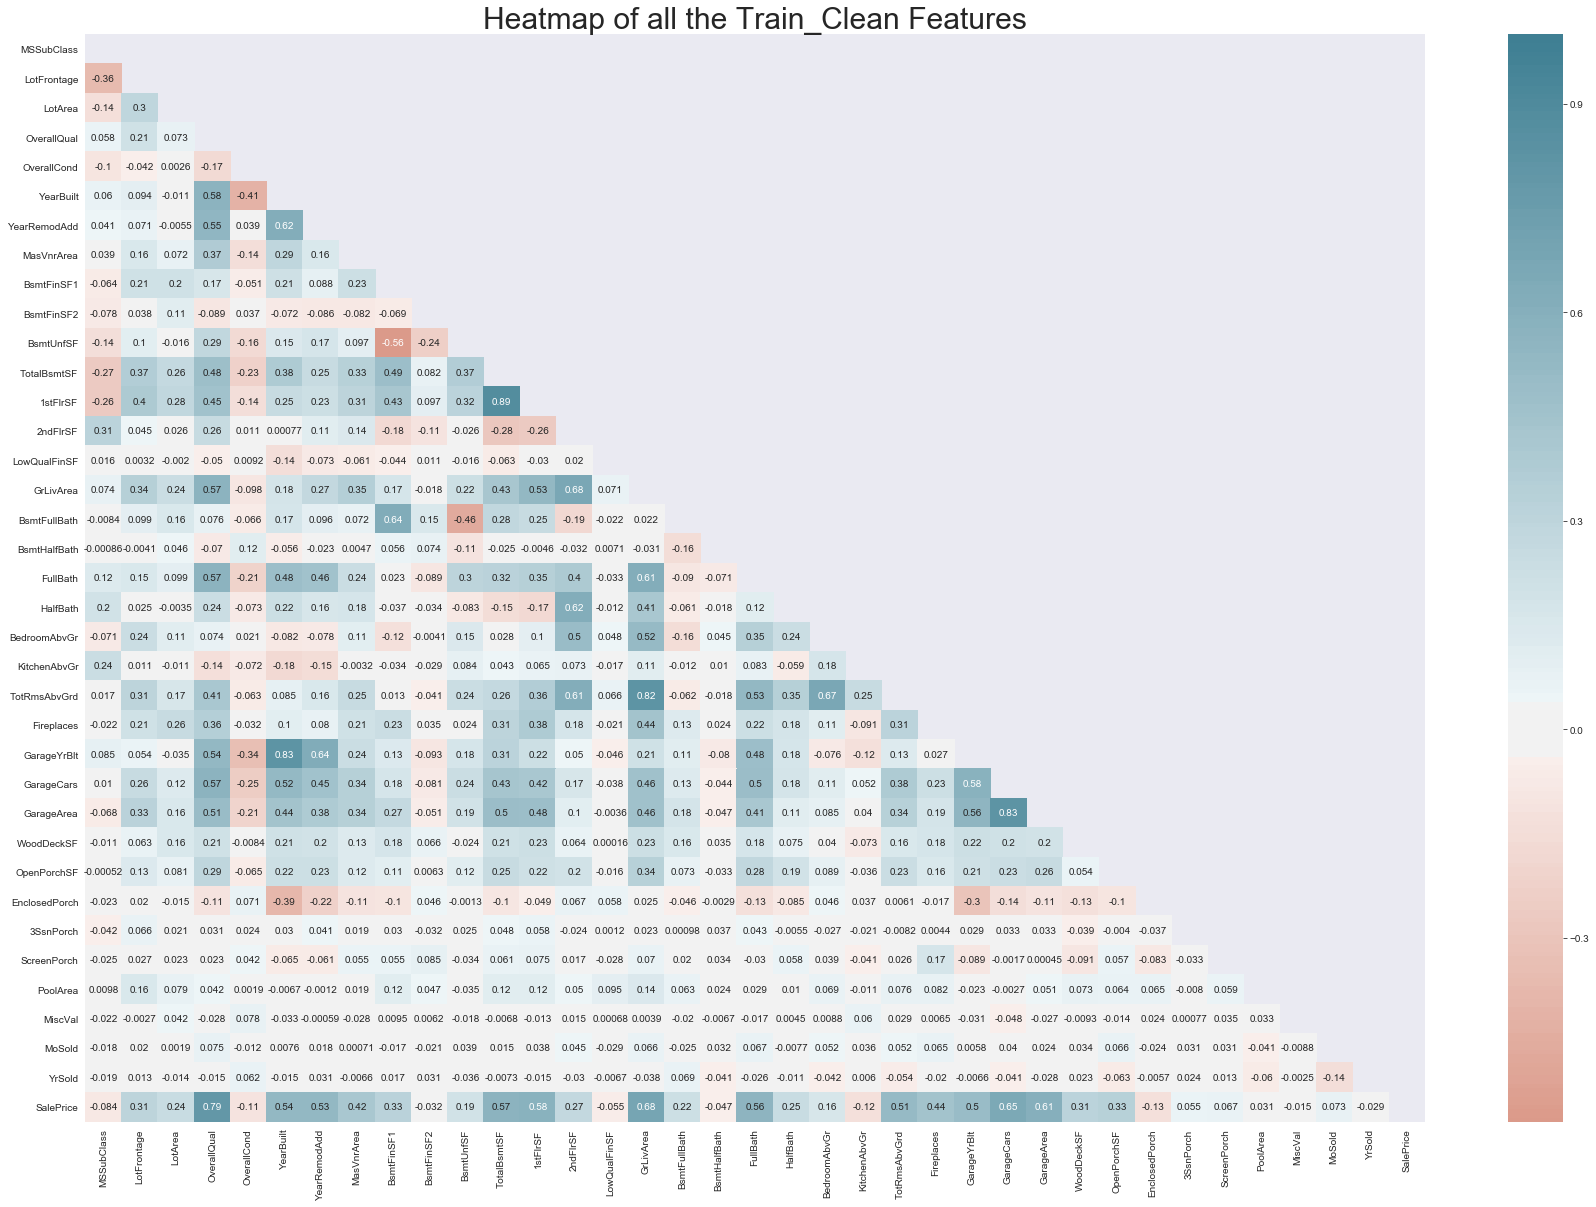

In [69]:
## Plotting heatmap. 

plt.subplots(figsize = (30,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train_clean.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df_train_clean.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0);
## Give title and shape. 
plt.title("Heatmap of all the Train_Clean Features", fontsize = 30);

In [70]:
### Put here the graph with the top 10/15 variables with highly correlation 

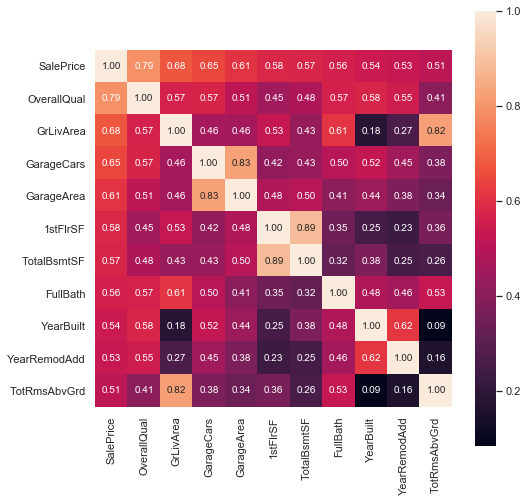

In [112]:
#Heat Map with the top 10 variables with the highest correlation to the SalePrice feature
k = 11 #number of variables for heatmap
corrmat = df_train_clean.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train_clean[cols].values.T)
plt.figure(figsize=(8, 8))
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

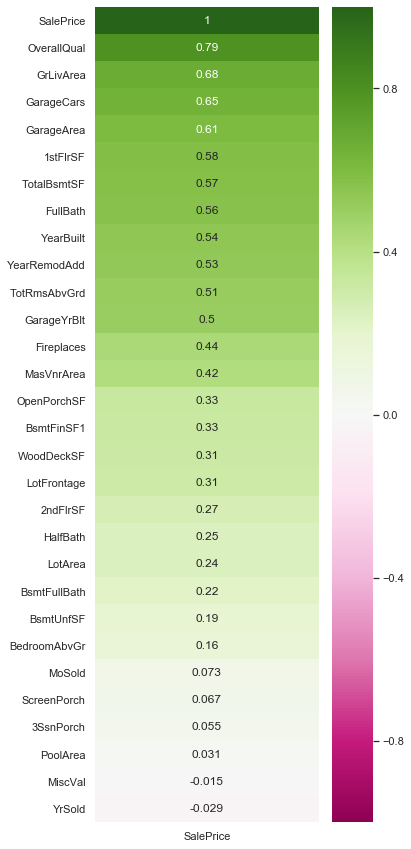

In [113]:
#Individual value of the top 30 correlated variable with the SalePrice feature
corr_new_train=df_train_clean.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 12},vmin=-1, cmap='PiYG', annot=True)
sns.set(font_scale=1)

__Comments & Observations:__
We realized that the "Top 10" variables highly correlated with the SalePrice variable are the following ones: 'OverallQual',  'GrLivArea', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt', 'YearRemodAdd' and 'TotRmsAbvGrd'

Let's analyze the distribution of the "Top 10" variables with highly correlation building a histogram graphs.

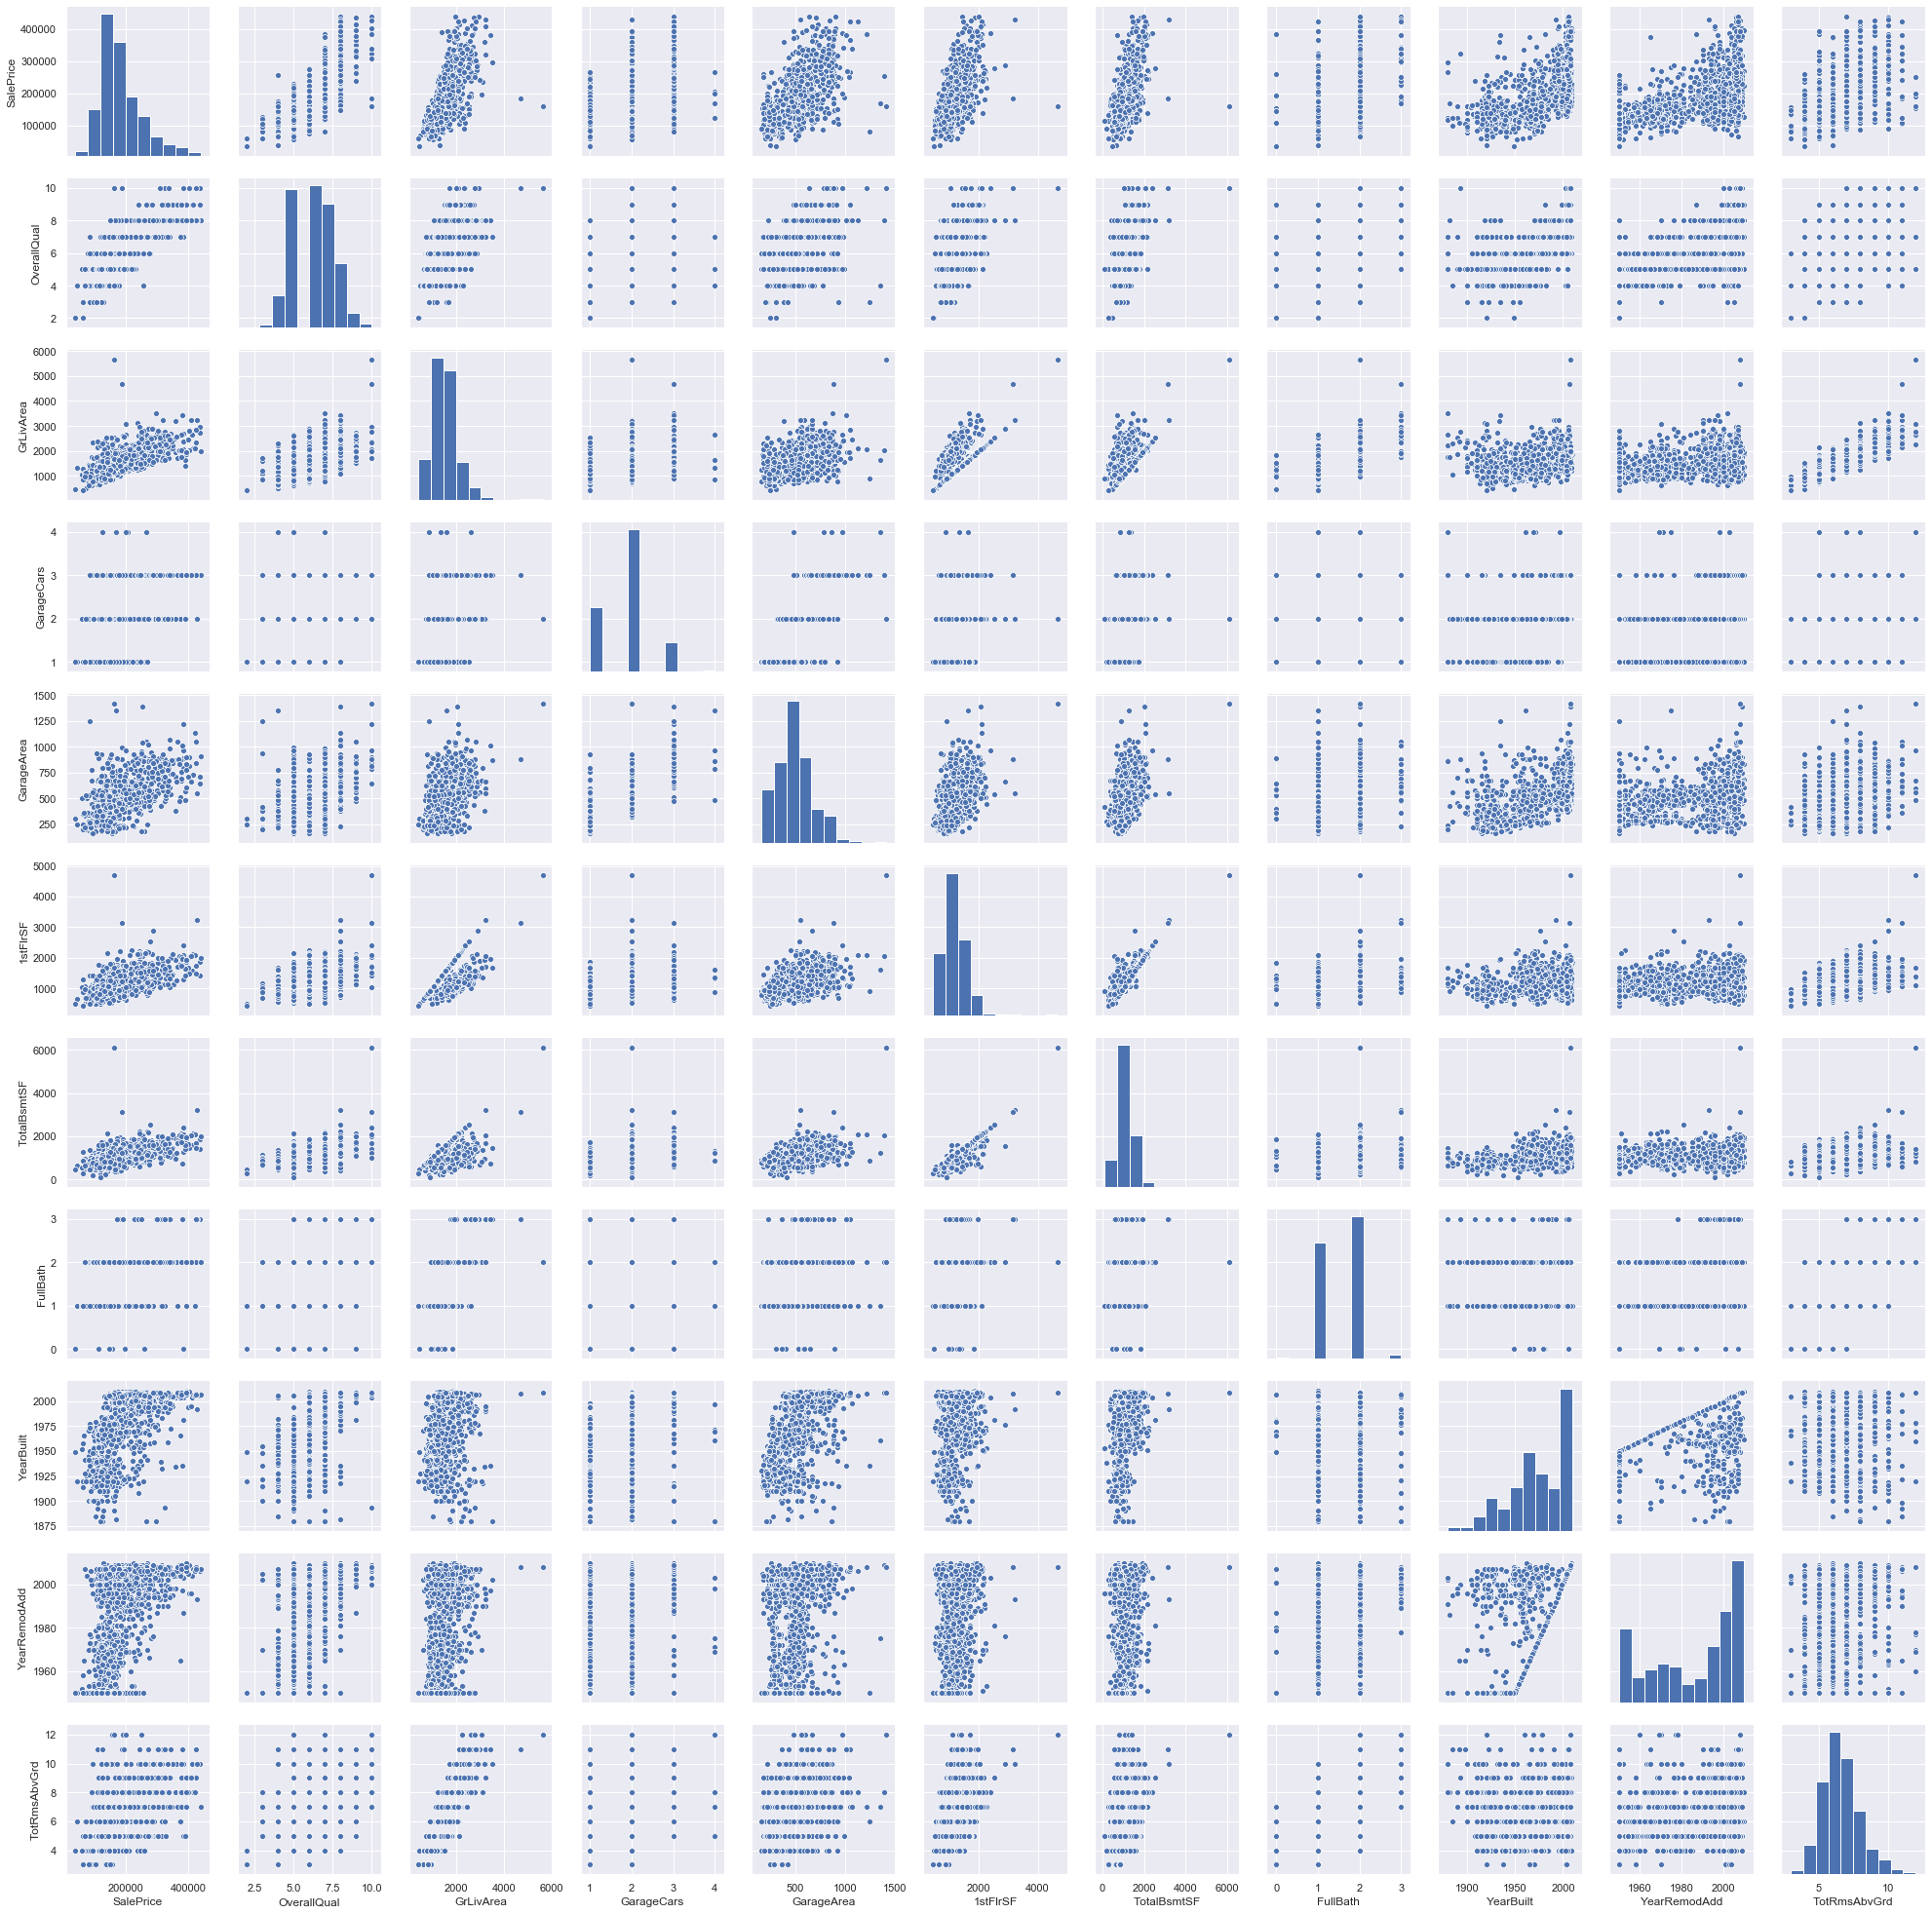

In [115]:
#Summarized information of distribution of the top 10 variables with the SalePrice feature
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea','1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd'] 
sns.pairplot(df_train_clean[cols], height = 2.5)
plt.show();

We are going to start with the analysis of the distribution of the float variables with highly correlation.

Text(0.5, 1.0, 'Garage Cars Distribution')

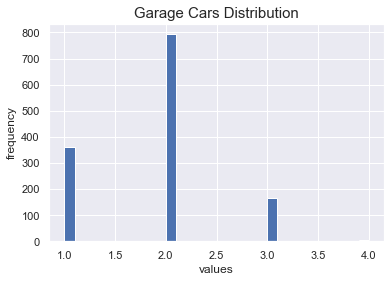

In [136]:
# GarageCars Histogram
df_train_clean['GarageCars'].hist(density=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Garage Cars Distribution', fontsize = 15)

In [138]:
# GarageCars relateive frequency table
100 * df_train_clean['GarageCars'].value_counts() / len(df_train_clean['GarageCars'])  

2.0    59.894260
1.0    27.265861
3.0    12.462236
4.0     0.377644
Name: GarageCars, dtype: float64

Text(0.5, 1.0, 'Garage Area Distribution')

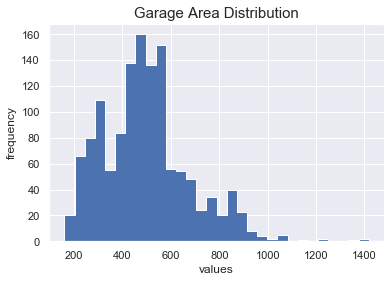

In [139]:
# GarageArea Histogram
df_train_clean['GarageArea'].hist(density=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Garage Area Distribution', fontsize = 15)

Text(0.5, 1.0, 'Total square feet of basement area - Distribution')

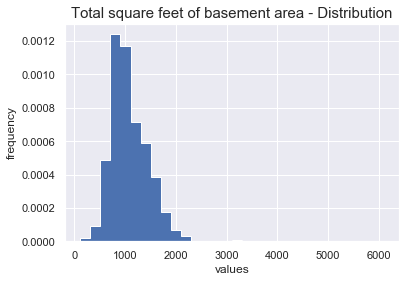

In [144]:
# TotalBsmtSF Histogram
df_train_clean['TotalBsmtSF'].hist(density=1, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Total square feet of basement area - Distribution', fontsize = 15)

Text(0.5, 1.0, 'Garage Year Built Distribution')

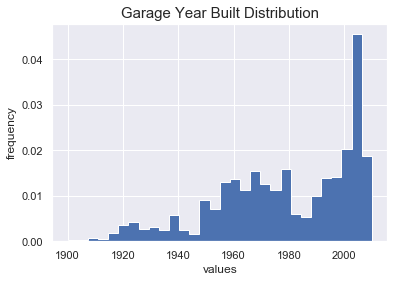

In [143]:
# GarageYrBlt Histogram
df_train_clean['GarageYrBlt'].hist(density=1, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Garage Year Built Distribution', fontsize = 15)

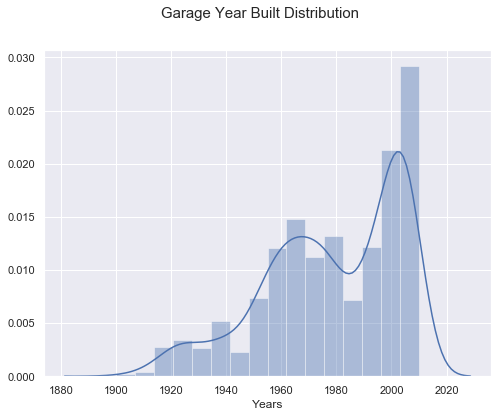

In [123]:
# GarageYrBlt Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['GarageYrBlt'], ax=ax)

ax.set_xlabel('')
plt.suptitle('Garage Year Built Distribution', size=15)
ax.set_xlabel('Years')
plt.show()

__Comments and Observations:__

* Except "Yearbuilt", the rest of the variables show an abnormal distribution with a strong influence of the values positioned on the left side of the graph.
* GarageCars analysis =>> About 60% of the sample analyzed has a space available for 2 cars, while the remaining 40% is divided into 1 and 3 slots for cars (27% for 1 car slot and 13% for 3 car slots, respectively).
* Regarding the Garage Area distribution, we observe that the garages with a capacity between 400-600 square feet are those that present a higher frequency in the analyzed sample, while the total square feet of basement with a higher frequency is between the 500 and 1500 square of feet.
* Finally, we observe that the most part of the garages built between the range of the year 1960 until the first decade of the 2000s, highlighting the high peak recorded in the first decade of the 21st century.

Let's continue with the analysis of the distribution of the integer variables with highly correlation.

Text(0.5, 1.0, 'Rates of material quality - Distribution')

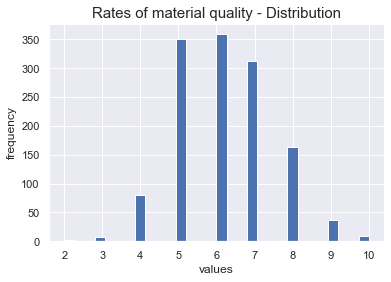

In [168]:
# OverallQual Histogram 
df_train_clean['OverallQual'].hist(density=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Rates of material quality - Distribution', fontsize = 15)

In [148]:
# OverallQual relateive frequency table
100 * df_train_clean['OverallQual'].value_counts() / len(df_train_clean['OverallQual'])  

6     27.114804
5     26.510574
7     23.564955
8     12.386707
4      6.117825
9      2.794562
10     0.755287
3      0.604230
2      0.151057
Name: OverallQual, dtype: float64

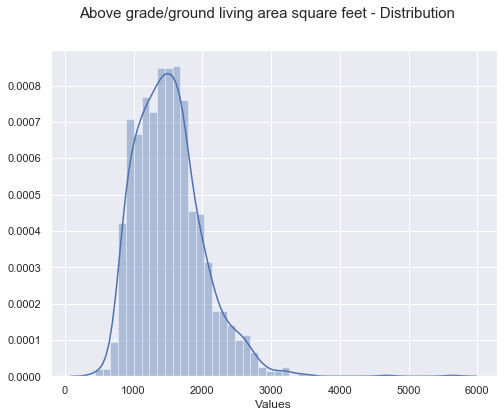

In [152]:
#GrLivArea Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['GrLivArea'], ax=ax)

ax.set_xlabel('Values')
plt.suptitle('Above grade/ground living area square feet - Distribution', size=15)
plt.show()

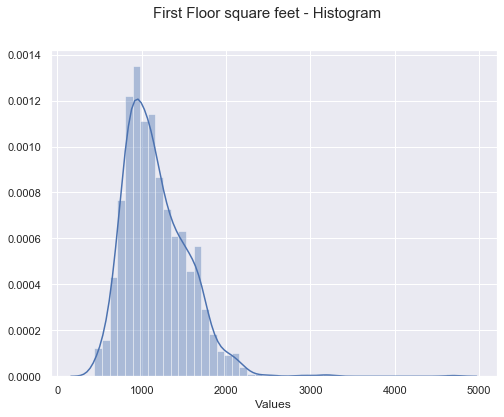

In [154]:
#1stFlrSF Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['1stFlrSF'], ax=ax)

ax.set_xlabel('Values')
plt.suptitle('First Floor square feet - Histogram', size=15)
plt.show()

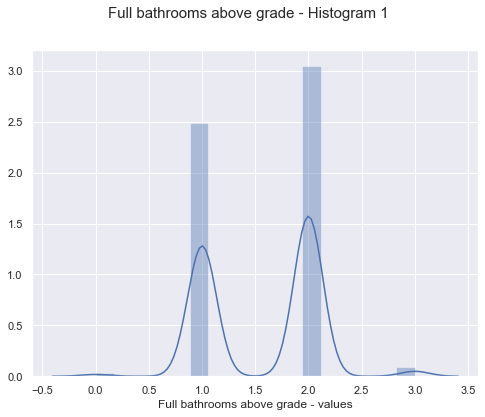

In [162]:
#FullBath Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['FullBath'], ax=ax)

ax.set_xlabel('Full bathrooms above grade - values')
plt.suptitle('Full bathrooms above grade - Histogram 1', size=15)
plt.show()

Text(0.5, 1.0, 'Full bathrooms above grade - Distribution 2')

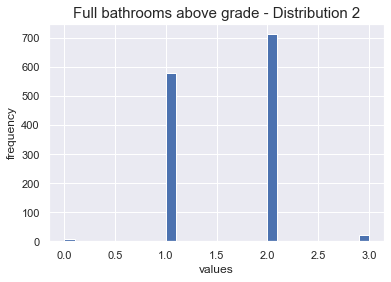

In [167]:
# FullBath Histogram 2
df_train_clean['FullBath'].hist(density=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Full bathrooms above grade - Distribution 2', fontsize = 15)

In [155]:
# FullBath relateive frequency table
100 * df_train_clean['FullBath'].value_counts() / len(df_train_clean['FullBath'])  

2    53.851964
1    43.882175
3     1.661631
0     0.604230
Name: FullBath, dtype: float64

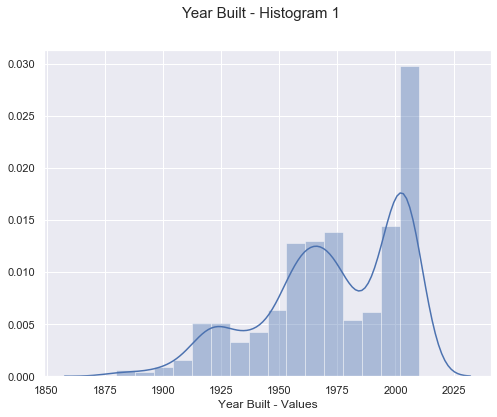

In [164]:
#YearBuilt Histogram 1
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['YearBuilt'], ax=ax)

ax.set_xlabel('Year Built - Values')
plt.suptitle('Year Built - Histogram 1', size=15)
plt.show()

Text(0.5, 1.0, 'Year Built - Histogram 2')

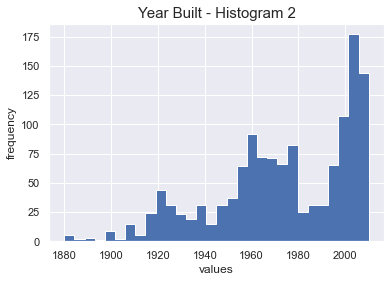

In [165]:
# YearBuilt Histogram 2
df_train_clean['YearBuilt'].hist(density=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Year Built - Histogram 2', fontsize = 15)

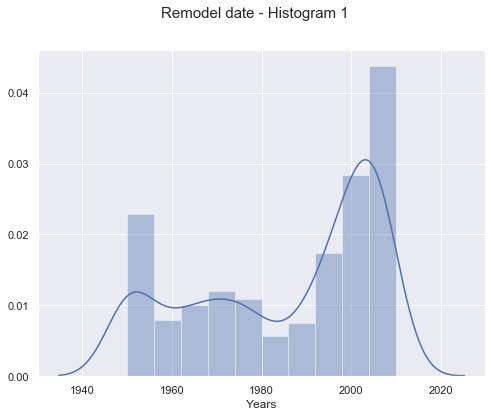

In [171]:
#YearRemodAdd Histogram 1
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['YearRemodAdd'], ax=ax)

ax.set_xlabel('Years')
plt.suptitle('Remodel date - Histogram 1', size=15)
plt.show()

Text(0.5, 1.0, 'Remodel date - Histogram 2')

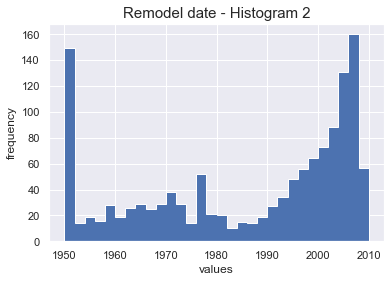

In [170]:
# YearRemodAdd Histogram 2
df_train_clean['YearRemodAdd'].hist(density=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Remodel date - Histogram 2', fontsize = 15)

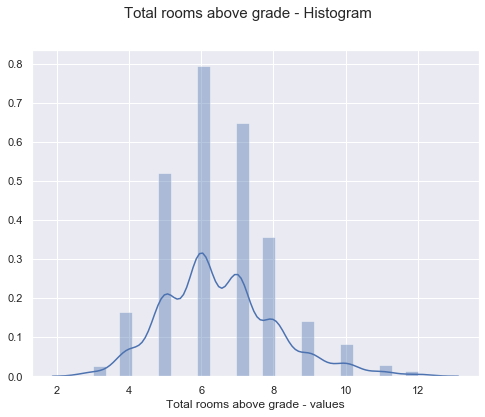

In [132]:
#TotRmsAbvGrd Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['TotRmsAbvGrd'], ax=ax)

ax.set_xlabel('Total rooms above grade - values')
plt.suptitle('Total rooms above grade - Histogram 1', size=15)
plt.show()

Text(0.5, 1.0, 'Total rooms above grade - Histogram 2')

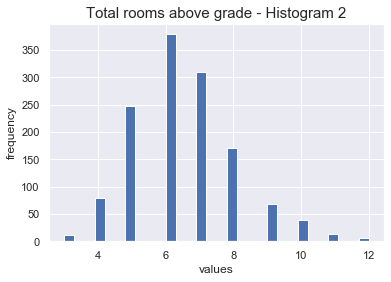

In [166]:
# TotRmsAbvGrd Histogram 
df_train_clean['TotRmsAbvGrd'].hist(density=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Total rooms above grade - Histogram 2', fontsize = 15)

In [158]:
# TotRmsAbvGrd relateive frequency table
100 * df_train_clean['TotRmsAbvGrd'].value_counts() / len(df_train_clean['TotRmsAbvGrd'])  

6     28.625378
7     23.338369
5     18.731118
8     12.839879
4      5.966767
9      5.135952
10     2.945619
11     1.057402
3      0.906344
12     0.453172
Name: TotRmsAbvGrd, dtype: float64

__Comments and Observations:__

* "Rates of material quality" analysis =>> The 77% of the analyzed sample is located in ratios of 5 (Average), 6 (Above average) and 7 (Good). Barely the 12% has registered ratios of 8 (very good) and 9 (Excellent).
* Regarding the capacity, checking the TotRmsAbvGrd we realized that the 52% of the sample is located along records of 6 and 7 rooms (28.62% and 23.39% respectively), while the 54% of the records of the variable FullBath is located in two-bathroom houses and the 44% in one-bathroom houses.
* Keeping in mind the time, the construction of most of the houses was done between the 1960s and 2010, highlighting a strong peak of construction in the first decade of the 2000s. These resulst are similar to the Remodel data, so the most of the houses have been remodeled between the 1950s and 2010, highlighting a peak in the 2010s.
* Finally, we realized that the most of the recordas of the "First Floor square feet" variable is between the 500 and 1500 quare feet, while the "Above grade/ground living area square feet" show a high record between the 1000 and 2000 square feet.

### 4.2 Data Visualization & Categorical Data Analysis

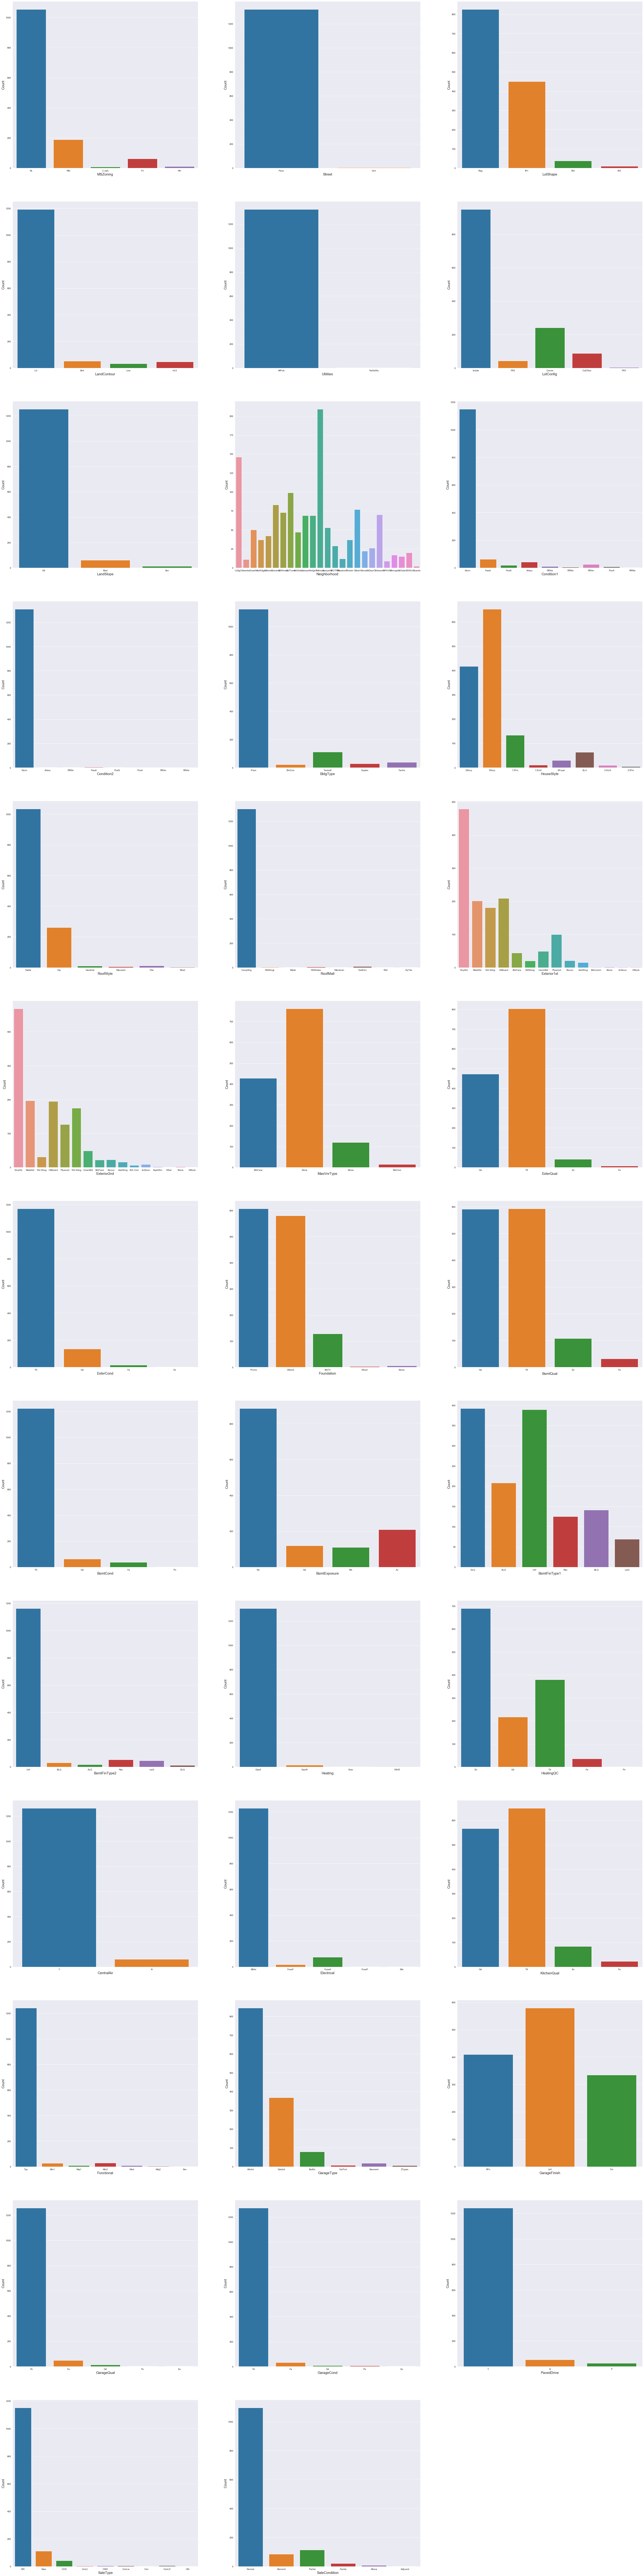

In [83]:
# Count plots for categorical variables

fig, axes = plt.subplots(ncols=2, nrows=0, figsize =(20,240))
sns.color_palette("husl", 8)
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 3,i)
    sns.countplot(df_train_clean[feature])
    plt.xlabel(f'{feature}', size=15)
    plt.ylabel('Count', size=15)
plt.show()

__Comments and Observatons:__

It looks like .....

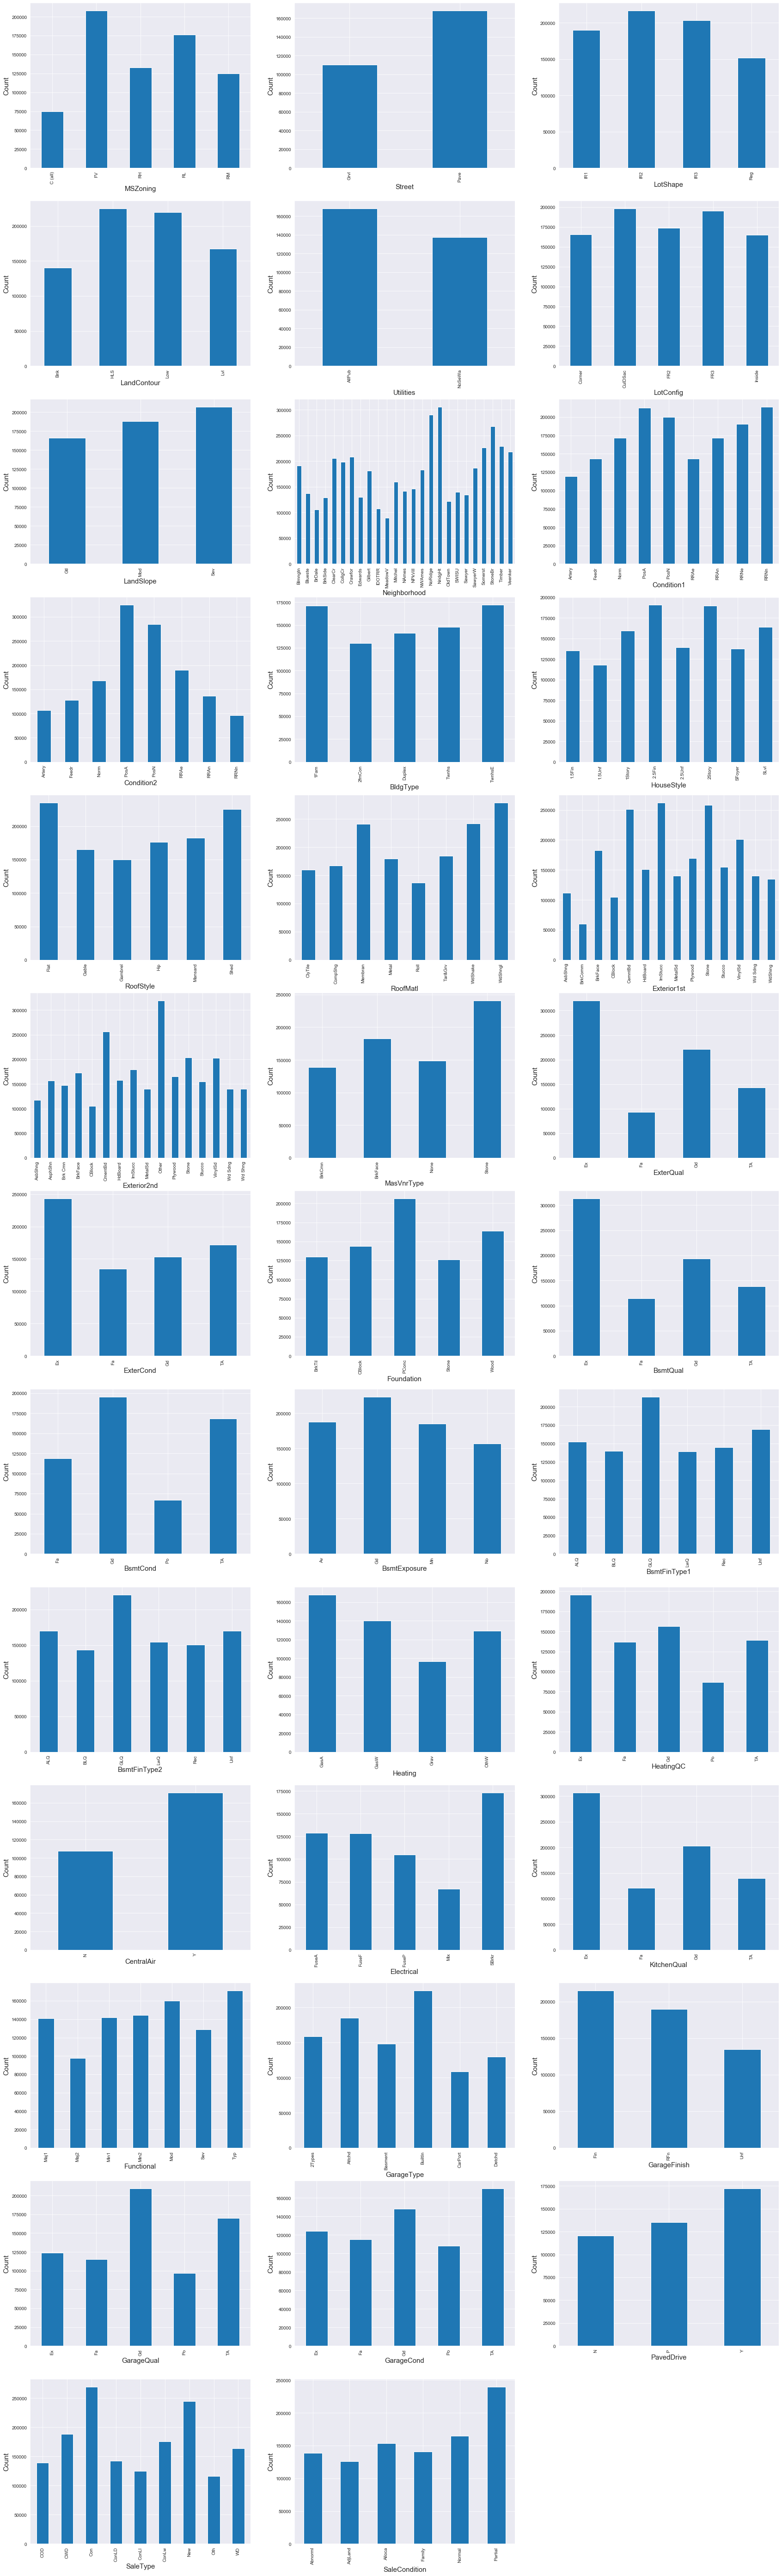

In [84]:
# Categorised Mean/Median for categorical data

fig, axes = plt.subplots(ncols=2, nrows=0, figsize =(12,120))
sns.color_palette("husl", 8)
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 3,i)
    df_train_clean.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(f'{feature}', size=15)
    plt.ylabel('Count', size=15)
plt.show()

__Comments and Observatons:__

It looks like .....

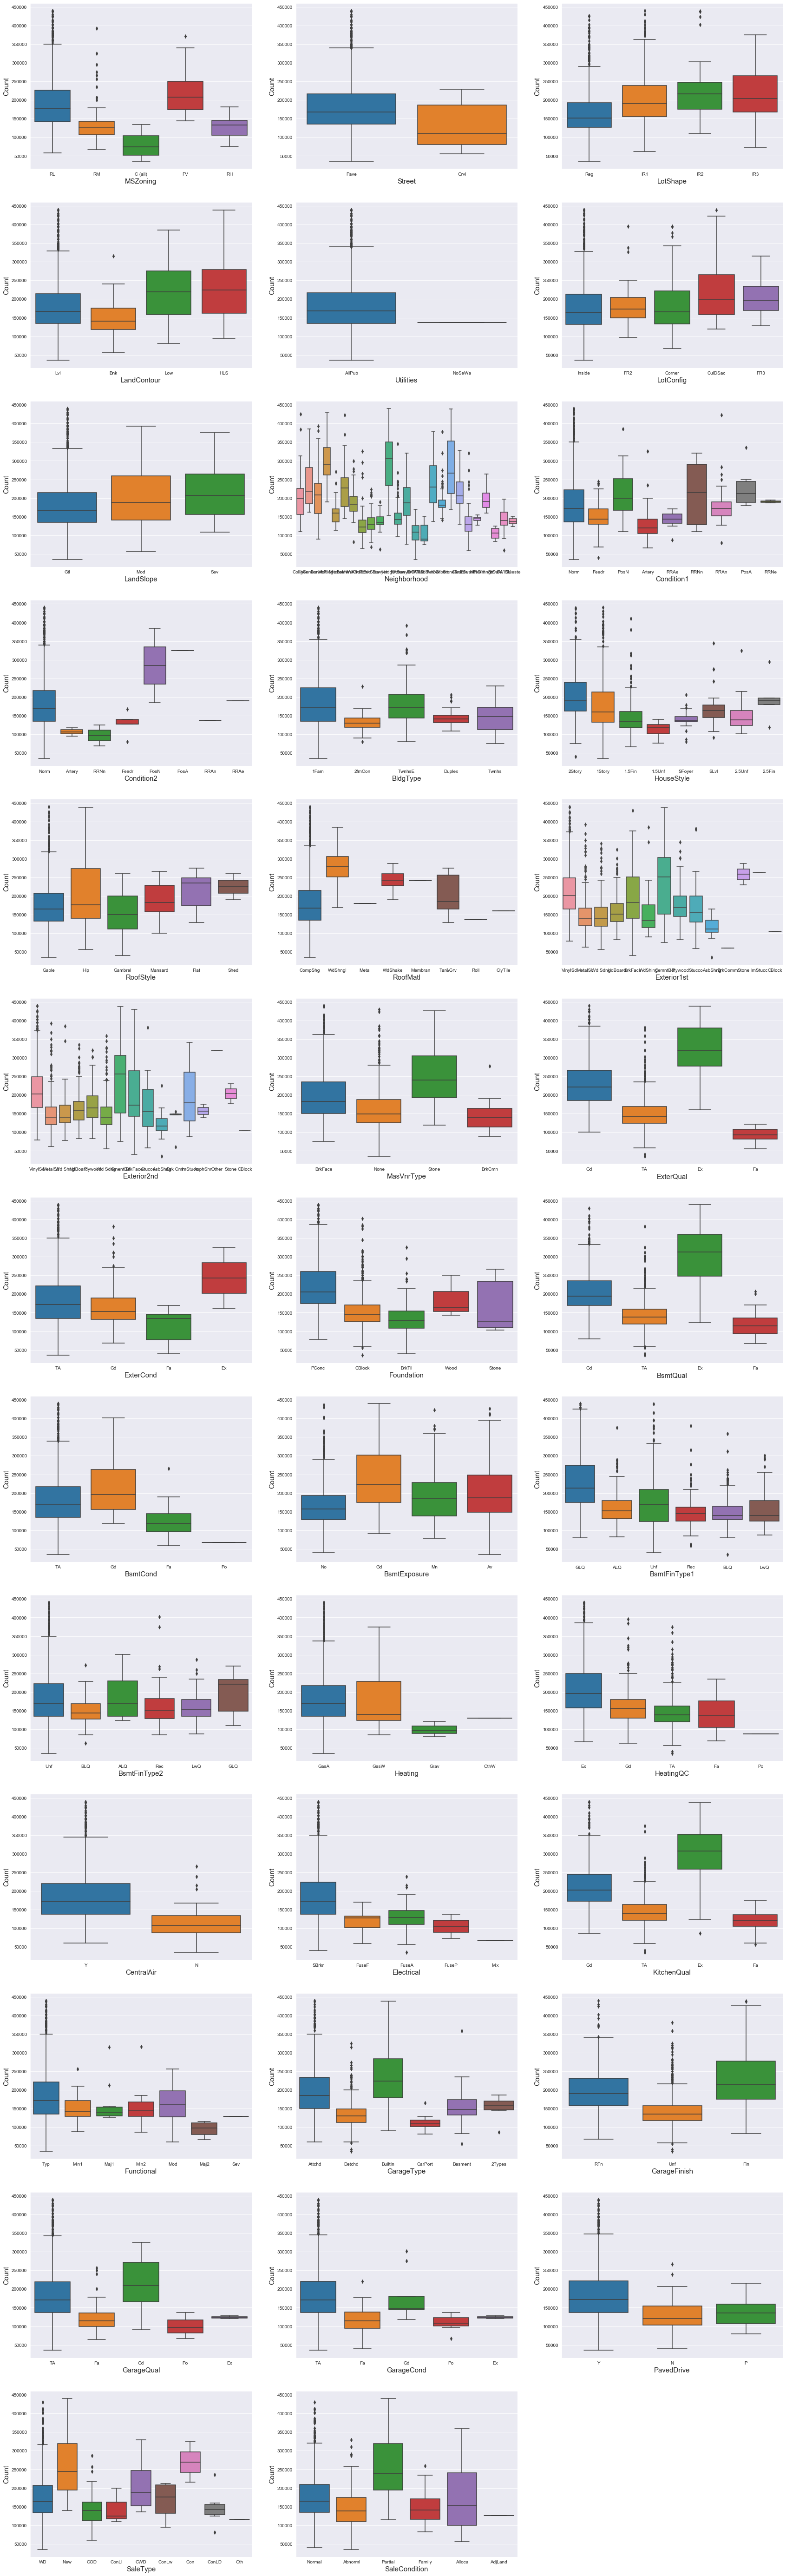

In [85]:
# Boxplots for categorical variables

fig, axes = plt.subplots(ncols=2, nrows=0, figsize =(12,120))
sns.color_palette("husl", 8)
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 3,i)
    sns.boxplot(y = 'SalePrice', x = feature, data= df_train_clean)
    plt.xlabel(f'{feature}', size=15)
    plt.ylabel('Count', size=15)
plt.show()

__Comments and Observations:__

We realized that ....

## 5 Building the Prediction Model 

### 5.1 Preparing the data  

#### 5.1.1 Convert categorical variables into numerical variables 

In [175]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_train_clean.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df_train_clean[col] = lencoders[col].fit_transform(df_train_clean[col])

In [176]:
df_train_clean.head(20)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0           60         3         65.0     8450       1         3            3   
1           20         3         80.0     9600       1         3            3   
2           60         3         68.0    11250       1         0            3   
3           70         3         60.0     9550       1         0            3   
4           60         3         84.0    14260       1         0            3   
5           50         3         85.0    14115       1         0            3   
6           20         3         75.0    10084       1         3            3   
7           60         3         68.0    10382       1         0            3   
8           50         4         51.0     6120       1         3            3   
9          190         3         50.0     7420       1         3            3   
10          20         3         70.0    11200       1         3            3   
11          60         3         85.0    11924       1         0            3   
12          20         3         68.0    12968       1         1            3   
13          20         3         91.0    10652       1         0            3   
14          20         3         68.0    10920       1         0            3   
15          45         4         51.0     6120       1         3            3   
16          20         3         68.0    11241       1         0            3   
18          20         3         66.0    13695       1         3            3   
19          20         3         70.0     7560       1         3            3   
20          60         3        101.0    14215       1         0            3   

    Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0           0          4          0  ...              0          0   
1           0          2          0  ...              0          0   
2           0          4          0  ...              0          0   
3           0          0          0  ...            272          0   
4           0          2          0  ...              0          0   
5           0          4          0  ...              0        320   
6           0          4          0  ...              0          0   
7           0          0          0  ...            228          0   
8           0          4          0  ...            205          0   
9           0          0          0  ...              0          0   
10          0          4          0  ...              0          0   
11          0          4          0  ...              0          0   
12          0          4          0  ...              0          0   
13          0          4          0  ...              0          0   
14          0          0          0  ...            176          0   
15          0          0          0  ...              0          0   
16          0          1          0  ...              0          0   
18          0          4          0  ...              0          0   
19          0          4          0  ...              0          0   
20          0          0          0  ...              0          0   

    ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0             0         0        0       2    2008         8              4   
1             0         0        0       5    2007         8              4   
2             0         0        0       9    2008         8              4   
3             0         0        0       2    2006         8              0   
4             0         0        0      12    2008         8              4   
5             0         0      700      10    2009         8              4   
6             0         0        0       8    2007         8              4   
7             0         0      350      11    2009         8              4   
8             0         0        0       4    2008         8              0   
9             0         0        0       

In [177]:
df_train_clean.shape

(1324, 75)

In [178]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1324 non-null int64
MSZoning         1324 non-null int32
LotFrontage      1324 non-null float64
LotArea          1324 non-null int64
Street           1324 non-null int32
LotShape         1324 non-null int32
LandContour      1324 non-null int32
Utilities        1324 non-null int32
LotConfig        1324 non-null int32
LandSlope        1324 non-null int32
Neighborhood     1324 non-null int32
Condition1       1324 non-null int32
Condition2       1324 non-null int32
BldgType         1324 non-null int32
HouseStyle       1324 non-null int32
OverallQual      1324 non-null int64
OverallCond      1324 non-null int64
YearBuilt        1324 non-null int64
YearRemodAdd     1324 non-null int64
RoofStyle        1324 non-null int32
RoofMatl         1324 non-null int32
Exterior1st      1324 non-null int32
Exterior2nd      1324 non-null int32
MasVnrType       1324 non-null int32
Mas

In [180]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_test_clean.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df_test_clean[col] = lencoders[col].fit_transform(df_test_clean[col])

In [181]:
df_test_clean.head(20)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0           20         2         80.0    11622       1         3            3   
1           20         3         81.0    14267       1         0            3   
2           60         3         74.0    13830       1         0            3   
3           60         3         78.0     9978       1         0            3   
4          120         3         43.0     5005       1         0            1   
5           60         3         75.0    10000       1         0            3   
6           20         3         68.0     7980       1         0            3   
7           60         3         63.0     8402       1         0            3   
8           20         3         85.0    10176       1         3            3   
9           20         3         70.0     8400       1         3            3   
10         120         2         26.0     5858       1         0            3   
11         160         4         21.0     1680       1         3            3   
12         160         4         21.0     1680       1         3            3   
13         160         3         24.0     2280       1         3            3   
14         120         3         24.0     2280       1         3            3   
15          60         3        102.0    12858       1         0            3   
16          20         3         94.0    12883       1         0            3   
17          20         3         90.0    11520       1         3            3   
18          20         3         79.0    14122       1         0            3   
19          20         3        110.0    14300       1         3            1   

    Utilities  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0           0          4          0  ...            0              0   
1           0          0          0  ...           36              0   
2           0          4          0  ...           34              0   
3           0          4          0  ...           36              0   
4           0          4          0  ...           82              0   
5           0          0          0  ...           84              0   
6           0          4          0  ...           21              0   
7           0          4          0  ...           75              0   
8           0          4          0  ...            0              0   
9           0          0          0  ...            0              0   
10          0          2          0  ...           68              0   
11          0          4          0  ...            0              0   
12          0          4          0  ...            0              0   
13          0          2          0  ...            0              0   
14          0          2          0  ...           30              0   
15          0          4          0  ...          133              0   
16          0          0          0  ...           35              0   
17          0          4          0  ...           74              0   
18          0          4          0  ...          119              0   
19          0          4          1  ...          150              0   

    3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0           0          120         0        0       6    2010         8   
1           0            0         0    12500       6    2010         8   
2           0            0         0        0       3    2010         8   
3           0            0         0        0       6    2010         8   
4           0          144         0        0       1    2010         8   
5           0            0         0        0       4    2010         8   
6           0            0         0      500       3    2010         8   
7           0            0         0        0       5    2010         8   
8           0            0         0        0       2    2010         8   
9           0            0         0   

In [182]:
df_test_clean.shape

(1319, 74)

In [183]:
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1319 entries, 0 to 1458
Data columns (total 74 columns):
MSSubClass       1319 non-null int64
MSZoning         1319 non-null int32
LotFrontage      1319 non-null float64
LotArea          1319 non-null int64
Street           1319 non-null int32
LotShape         1319 non-null int32
LandContour      1319 non-null int32
Utilities        1319 non-null int32
LotConfig        1319 non-null int32
LandSlope        1319 non-null int32
Neighborhood     1319 non-null int32
Condition1       1319 non-null int32
Condition2       1319 non-null int32
BldgType         1319 non-null int32
HouseStyle       1319 non-null int32
OverallQual      1319 non-null int64
OverallCond      1319 non-null int64
YearBuilt        1319 non-null int64
YearRemodAdd     1319 non-null int64
RoofStyle        1319 non-null int32
RoofMatl         1319 non-null int32
Exterior1st      1319 non-null int32
Exterior2nd      1319 non-null int32
MasVnrType       1319 non-null int32
Mas

#### 5.1.2 Getting the Independent and Dependent variables  

In [185]:
X_train = df_train_clean.iloc[:, :-1] #all lines, all columns except the last one
y_train = df_train_clean.iloc[:, 74] #all lines, only the last column

In [191]:
#check the shaape of X_train and y_train
X_train.shape, y_train.shape

((1324, 74), (1324,))

### 5.2 Variables Selection 

In multiple linear regression, we have several independent variables to predict the dependent variable. Therefore, it is necessary to choose the dependent variables that will be part of our model, so we need to reject some of them to build the model correctly.

In our analysis, we will use the following methods to choose the best variables for our model =>> **"Backward Elimination"** and **"Correlation Analysis"**.

#### 5.2.1 Applying Backward Elimination

Before starting analysing the Basward Elimination method for the suitable variables selection for our model, we need to explain the P-Values logic.

__What is a P-Value?__

The P-value is the probability of having a sample like ours, or more extreme than ours, if the null hypothesis is true.

* Null Hypothesis (H0) => It is the opposite statement reached by the researcher. Therefore, it is the hypothesis that the researcher intends to refuse. The H0 always brings a NO or unequal in the statement. Example: Fertilizer has NO effect on crops.
* Alternative Hypothesis (H1) => It is the conclusion reached by the researcher through his/her research.

In the following picture you can check more details about the P-Values logic:

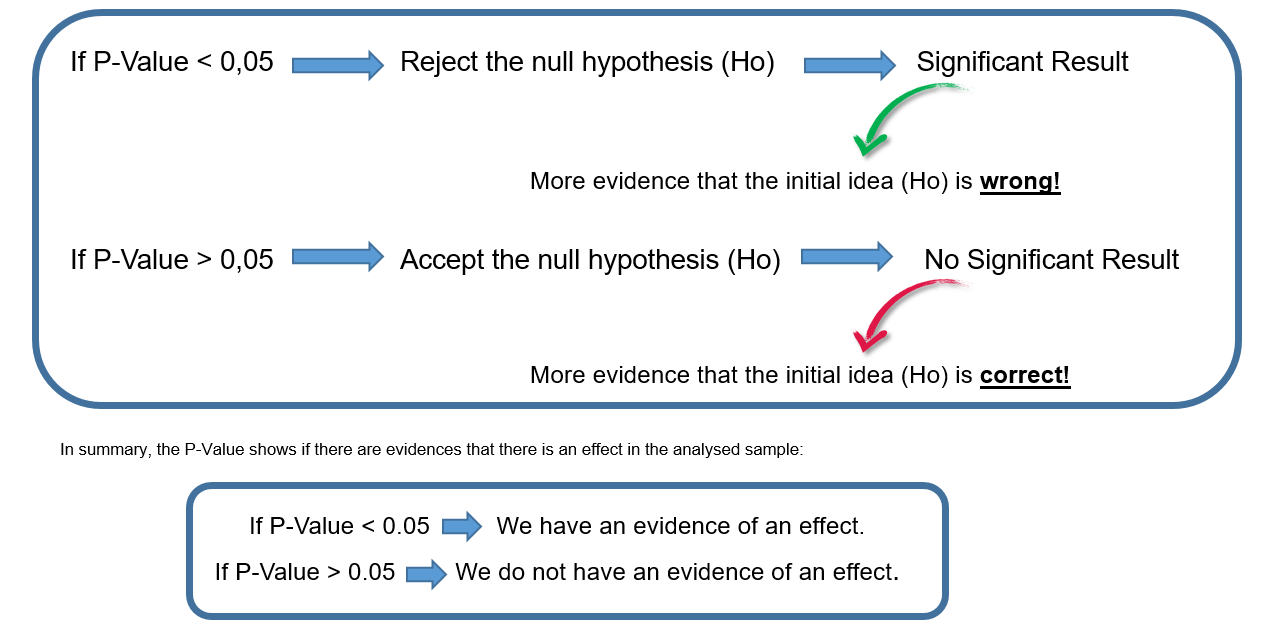

In [173]:
from IPython.core.display import Image
Image("PValues_Logic.PNG")

What does the **Backward Elimination** method consist of??

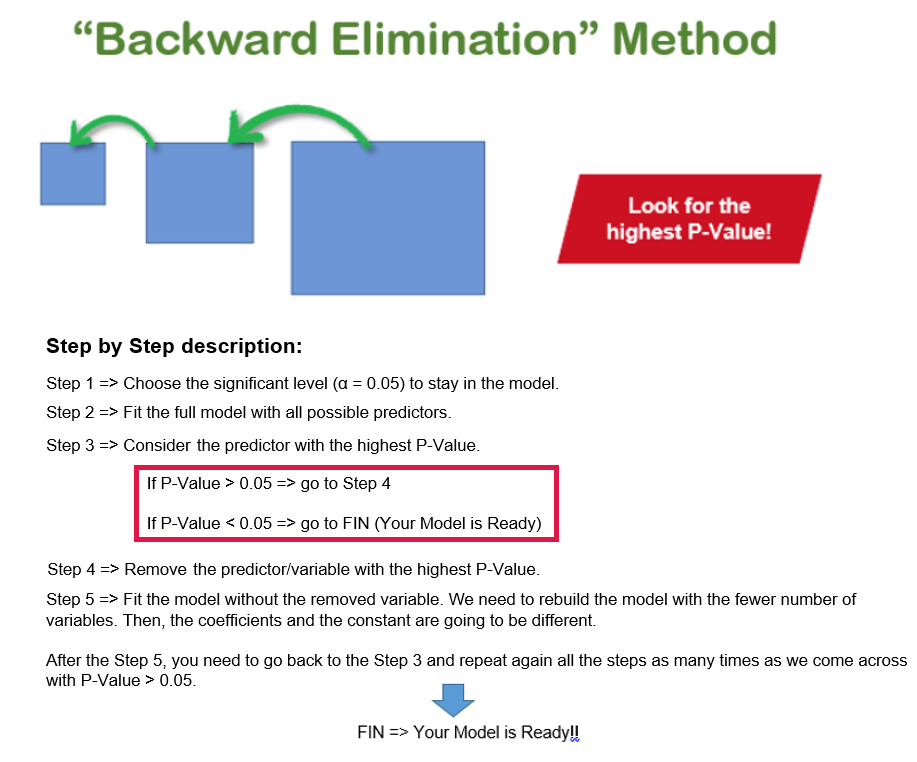

In [174]:
from IPython.core.display import Image
Image("Backward_Elimination.PNG")

Let's recreate the Backward Elimination method in our study case and review the results. 

In [194]:
##Step 1: Create a Ones Matrix
import statsmodels.formula.api as sm
X_train = np.append(arr = np.ones((1324, 1)).astype(int), values = X_train, axis = 1)

In [198]:
##Step 2: Fit the full model with all possible predictions
import statsmodels.api as sm
X_opt = X_train[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                   31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,
                   60,61,62,63,64,65,66,67,68,69,70,71,72,73,74]] #the values within the [] are the variables indexes
regressor_OLS = sm.OLS(endog = y_train, exog= X_opt).fit()
regressor_OLS.summary()

#OLS: Ordinary Least Squares

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     100.2
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:07:17   Log-Likelihood:                -15360.
No. Observations:                1324   AIC:                         3.087e+04
Df Residuals:                    1251   BIC:                         3.125e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.57e+06   1.19e+06      1.319      0.187   -7.65e+05     3.9e+06
x1          -111.4788     43.171     -2.582      0.010    -196.175     -26.783
x2         -2549.7810   1394.271     -1.829      0.068   -5285.148     185.586
x3          -162.3051     44.969     -3.609      0.000    -250.528     -74.082
x4             0.4143      0.094      4.401      0.000       0.230       0.599
x5          4.477e+04   1.36e+04      3.303      0.001    1.82e+04    7.14e+04
x6          -767.7926    592.114     -1.297      0.195   -1929.438     393.853
x7          2514.4957   1253.375      2.006      0.045      55.546    4973.445
x8         -4.658e+04   2.87e+04     -1.625      0.104   -1.03e+05    9645.711
x9           164.3187    490.115      0.335      0.737    -797.219    1125.857
x10         8939.2920   3499.331      2.555      0.011    2074.087    1.58e+04
x11          343.1807    140.015      2.451      0.014      68.490     617.871
x12           30.2053    898.532      0.034      0.973   -1732.591    1793.002
x13        -7089.6888   2909.055     -2.437      0.015   -1.28e+04   -1382.524
x14        -1861.4719   1373.052     -1.356      0.175   -4555.211     832.267
x15        -1182.4807    597.614     -1.979      0.048   -2354.916     -10.045
x16         1.255e+04   1106.221     11.341      0.000    1.04e+04    1.47e+04
x17         4360.8959    978.739      4.456      0.000    2440.745    6281.047
x18          270.8623     75.626      3.582      0.000     122.495     419.229
x19           82.4476     64.346      1.281      0.200     -43.791     208.686
x20         1351.6700   1011.466      1.336      0.182    -632.686    3336.026
x21          748.6943   1450.192      0.516      0.606   -2096.383    3593.772
x22        -1121.2569    492.093     -2.279      0.023   -2086.675    -155.838
x23          739.2259    437.220      1.691      0.091    -118.539    1596.991
x24         1131.6514   1397.915      0.810      0.418   -1610.864    3874.167
x25           16.7379      5.530      3.027      0.003       5.888      27.588
x26        -7095.7074   1827.461     -3.883      0.000   -1.07e+04   -3510.480
x27          763.8920   2157.595      0.354      0.723   -3469.012    4996.796
x28         2730.9846   1752.032      1.559      0.119    -706.261    6168.231
x29        -7486.1574   1297.937     -5.768      0.000      -1e+04   -4939.785
x30         2207.1101   1248.544      1.768      0.077    -242.361    4656.581
x31        -2455.4276    793.890     -3.093      0.002   -4012.930    -897.925
x32         -952.0965    570.865     -1.668      0.096   -2072.056     167.863
x33           -1.6472      2.647     -0.622      0.534      -6.840       3.546
x34         1529.5220   1209.972      1.264      0.206    -844.277    3903.321
x35            5.8401      5.330      1.096      0.273      -4.617      16.297
x3

We see that the x12 constant is the variable with the highest P-value (0.973), so we have to remove it and perform the code again.

In [200]:
##Step 3: Remove the predictor with the highest p-value and fit the model
import statsmodels.api as sm
X_opt = X_train[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                   31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,
                   60,61,62,63,64,65,66,67,68,69,70,71,72,73,74]] #the values within the [] are the variables indexes
regressor_OLS = sm.OLS(endog = y_train, exog= X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     101.7
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:10:35   Log-Likelihood:                -15360.
No. Observations:                1324   AIC:                         3.086e+04
Df Residuals:                    1252   BIC:                         3.124e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.57e+06   1.19e+06      1.320      0.187   -7.63e+05     3.9e+06
x1          -111.5064     43.146     -2.584      0.010    -196.153     -26.860
x2         -2548.7779   1393.395     -1.829      0.068   -5282.425     184.869
x3          -162.3831     44.891     -3.617      0.000    -250.453     -74.313
x4             0.4144      0.094      4.404      0.000       0.230       0.599
x5          4.472e+04   1.35e+04      3.320      0.001    1.83e+04    7.11e+04
x6          -769.4971    589.704     -1.305      0.192   -1926.413     387.419
x7          2514.6169   1252.870      2.007      0.045      56.661    4972.573
x8         -4.658e+04   2.86e+04     -1.626      0.104   -1.03e+05    9619.098
x9           164.9223    489.590      0.337      0.736    -795.586    1125.431
x10         8935.7269   3496.328      2.556      0.011    2076.419    1.58e+04
x11          342.9242    139.751      2.454      0.014      68.751     617.097
x12        -7098.4129   2896.299     -2.451      0.014   -1.28e+04   -1416.277
x13        -1862.4153   1372.218     -1.357      0.175   -4554.515     829.685
x14        -1181.2304    596.217     -1.981      0.048   -2350.926     -11.535
x15         1.255e+04   1105.501     11.349      0.000    1.04e+04    1.47e+04
x16         4361.1057    978.328      4.458      0.000    2441.762    6280.450
x17          270.8850     75.592      3.583      0.000     122.583     419.187
x18           82.5525     64.245      1.285      0.199     -43.487     208.592
x19         1351.2509   1010.985      1.337      0.182    -632.161    3334.663
x20          750.3677   1448.760      0.518      0.605   -2091.897    3592.632
x21        -1120.8647    491.758     -2.279      0.023   -2085.626    -156.103
x22          738.5830    436.627      1.692      0.091    -118.019    1595.185
x23         1132.0490   1397.307      0.810      0.418   -1609.272    3873.370
x24           16.7359      5.528      3.028      0.003       5.891      27.581
x25        -7093.4730   1825.524     -3.886      0.000   -1.07e+04   -3512.050
x26          767.5514   2153.987      0.356      0.722   -3458.271    4993.374
x27         2728.1455   1749.298      1.560      0.119    -703.732    6160.023
x28        -7487.8563   1296.435     -5.776      0.000      -1e+04   -4944.432
x29         2206.7228   1247.993      1.768      0.077    -241.665    4655.111
x30        -2454.0273    792.480     -3.097      0.002   -4008.762    -899.293
x31         -952.3645    570.582     -1.669      0.095   -2071.767     167.038
x32           -1.6463      2.646     -0.622      0.534      -6.837       3.545
x33         1528.3514   1208.988      1.264      0.206    -843.515    3900.218
x34            5.8411      5.328      1.096      0.273      -4.611      16.294
x35           -5.5666      2.695     -2.065      0.039     -10.854      -0.279
x3

We see that the x60 constant is the variable with the highest P-value (0.926), so we have to remove it and perform the code again.

#### 5.2.2  Applying Correlation Analysis 

## 6 Back-Up 

#### Feature Scaling 

In [109]:
# Normalization of values
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
#df_total_norm = pd.DataFrame(scaler.fit_transform(df_total.astype(float)))
#df_total_norm.head()

In [110]:
# Change the columns naming to  retrieve the original titles
#df_total_norm = df_total_norm.transpose().set_index(df_total.columns).transpose()

In [111]:
#check the changes in the dataset
#df_total_norm.head(10)